<a href="https://colab.research.google.com/github/RobertOldMan1978/Proyecto-DS-Challenge1/blob/main/OldMan_PROY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creacion Base de Ventas y Análisis de Facturación

---



In [69]:
from google.colab import files
uploaded = files.upload()

Saving tienda_1 .csv to tienda_1  (2).csv
Saving tienda_2.csv to tienda_2 (2).csv
Saving tienda_3.csv to tienda_3 (2).csv
Saving tienda_4.csv to tienda_4 (2).csv


In [70]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Agregamos columnas con distintos formatos de fecha para hacer el analisis mas simple.

In [71]:
import pandas as pd

# URLs de los archivos
urls = {
    "Tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar los archivos y añadir columna de tienda
dataframes = []
for tienda, url in urls.items():
    df = pd.read_csv(url)
    df["Tienda"] = tienda
    dataframes.append(df)

# Unir todos los dataframes
df_total = pd.concat(dataframes, ignore_index=True)

# Convertir la columna de fecha a datetime
df_total["Fecha de Compra"] = pd.to_datetime(df_total["Fecha de Compra"], dayfirst=True)

# Crear columnas nuevas
df_total["Año"] = df_total["Fecha de Compra"].dt.year
df_total["AñoMes"] = df_total["Fecha de Compra"].dt.strftime('%Y%m').astype(int)
df_total["Trimestre"] = df_total["Fecha de Compra"].dt.to_period("Q").astype(str).str.replace('Q', ' T')
df_total["Semestre"] = df_total["Fecha de Compra"].dt.month.map(lambda m: ' S1' if m <= 6 else ' S2')
df_total["Semestre"] = df_total["Año"].astype(str) + df_total["Semestre"]

# Mostrar los primeros registros
print(df_total.head())





            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-01-16      Pedro Gomez          Bogotá             4   
1      2022-05-18  Beatriz Morales        Medellín             1   
2      2021-03-15   Juan Fernandez       Cartagena             1   
3      2022-05-03   Juan Fernandez            Cali             4   
4      2020-11-07    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda   Año  \
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda_1

Análisis de las ventas por tienda por trimestre desde el 2020.

In [72]:
# Crear la tabla pivote: Tienda vs Trimestre (ventas en millones), con observed=True
pivot_trim = pd.pivot_table(df_total,
                            index="Tienda",
                            columns="Trimestre",
                            values="Precio",
                            aggfunc="sum",
                            fill_value=0,
                            observed=True)

# Ordenar las columnas de trimestre en orden descendente
pivot_trim = pivot_trim[sorted(pivot_trim.columns, reverse=True)]

# Convertir a millones
pivot_trim = pivot_trim / 1_000_000

# Formatear como pesos colombianos (millones)
pivot_trim = pivot_trim.round(2).astype(float).astype(str).map(
    lambda x: f"${float(x):,.2f}M".replace(",", "#").replace(".", ",").replace("#", ".")
)

# Reconstruir como DataFrame para mostrar en formato tabla
pivot_trim = pd.DataFrame(pivot_trim.values.reshape(pivot_trim.shape),
                          index=pivot_trim.index,
                          columns=pivot_trim.columns)

# Mostrar tabla
from IPython.display import display
display(pivot_trim)







Trimestre,2023 T1,2022 T4,2022 T3,2022 T2,2022 T1,2021 T4,2021 T3,2021 T2,2021 T1,2020 T4,2020 T3,2020 T2,2020 T1
Tienda,,,,,,,,,,,,,
Tienda_1,"$103,26M","$72,54M","$92,16M","$72,47M","$79,40M","$77,03M","$116,32M","$81,25M","$87,52M","$69,23M","$96,46M","$98,55M","$104,70M"
Tienda_2,"$86,43M","$91,89M","$85,61M","$93,09M","$87,64M","$89,87M","$96,57M","$83,67M","$81,10M","$84,12M","$78,15M","$79,17M","$79,03M"
Tienda_3,"$62,92M","$87,59M","$87,88M","$85,69M","$89,28M","$133,05M","$75,57M","$83,44M","$70,89M","$75,24M","$86,15M","$78,93M","$81,38M"
Tienda_4,"$57,48M","$67,34M","$72,66M","$64,33M","$97,89M","$85,66M","$92,20M","$77,48M","$92,48M","$75,47M","$86,33M","$98,34M","$70,71M"


Crea grafico de ventas mensuales por tienda y luego con media movil de tres meses para analizar las tendencias.

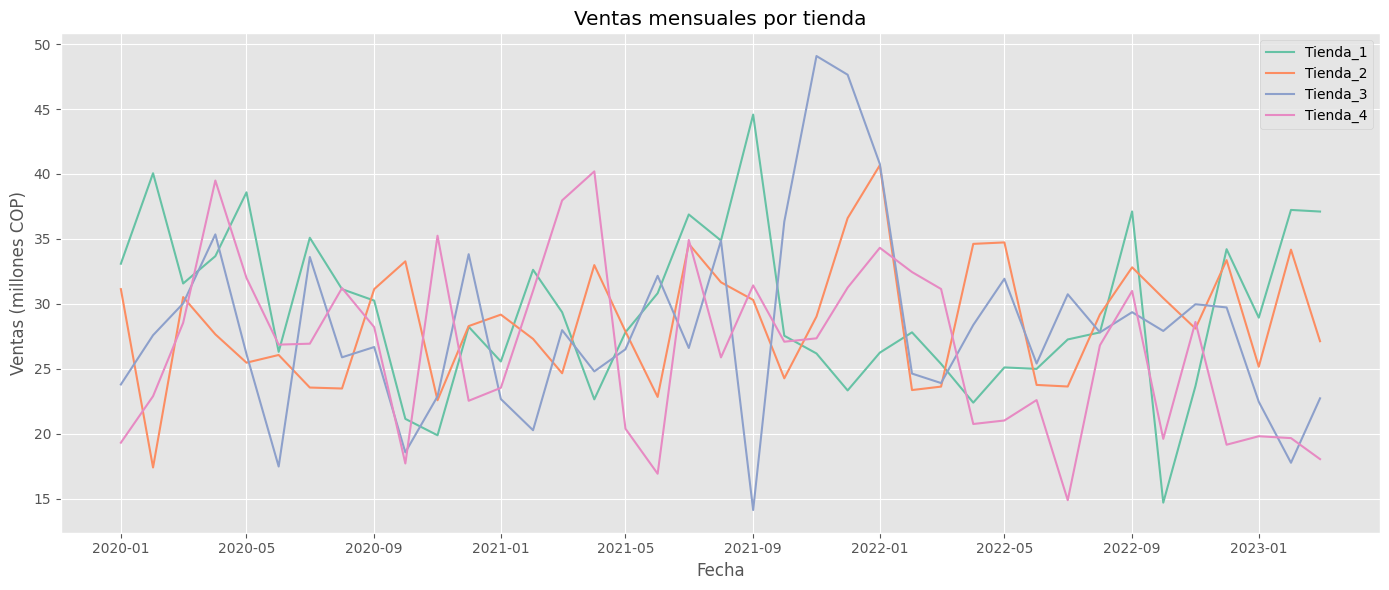

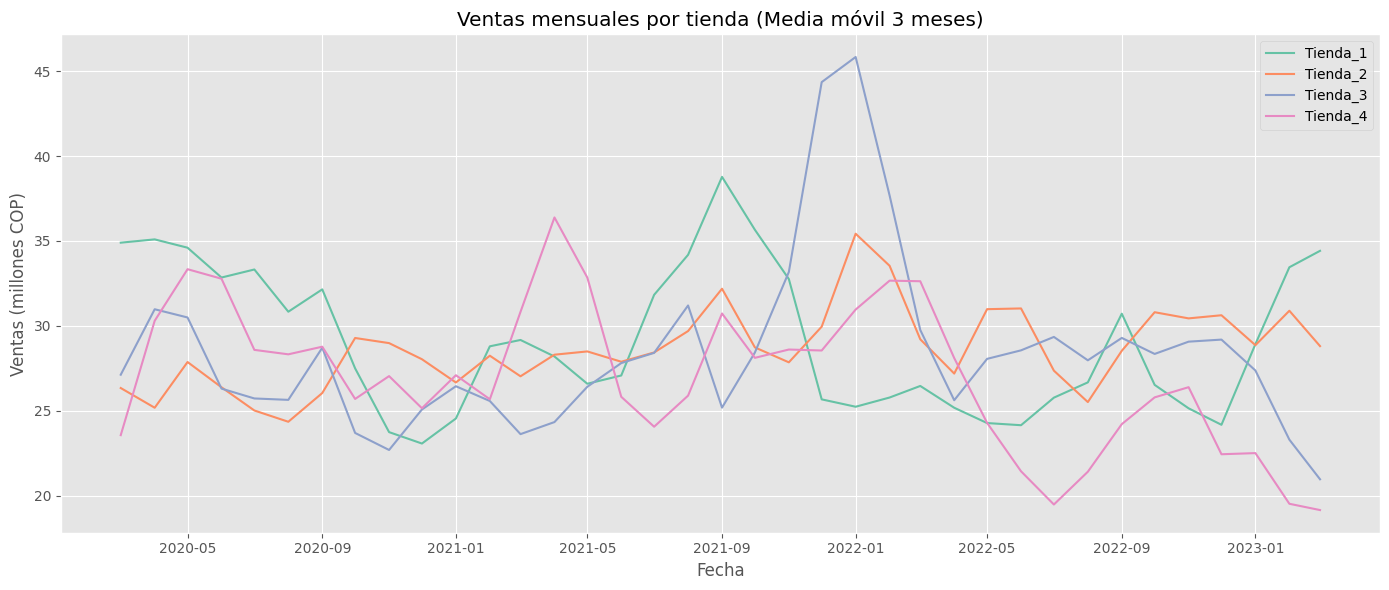

In [73]:
import matplotlib.pyplot as plt

# Aseguramos que AñoMes esté en formato datetime para mejor manejo en gráficos
df_total["AñoMes_dt"] = pd.to_datetime(df_total["AñoMes"], format="%Y%m")

# Agrupamos ventas por tienda y mes
ventas_mensuales = df_total.groupby(["Tienda", "AñoMes_dt"], observed=True)["Precio"].sum().reset_index()

# === 1. GRÁFICO DE LÍNEAS ===
plt.figure(figsize=(14, 6))
for tienda in ventas_mensuales["Tienda"].unique():
    datos = ventas_mensuales[ventas_mensuales["Tienda"] == tienda]
    plt.plot(datos["AñoMes_dt"], datos["Precio"] / 1_000_000, label=tienda)
plt.title("Ventas mensuales por tienda")
plt.xlabel("Fecha")
plt.ylabel("Ventas (millones COP)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. GRÁFICO CON MEDIA MÓVIL DE 3 MESES ===
plt.figure(figsize=(14, 6))
for tienda in ventas_mensuales["Tienda"].unique():
    datos = ventas_mensuales[ventas_mensuales["Tienda"] == tienda].copy()
    datos["Media_movil"] = datos["Precio"].rolling(window=3).mean()
    plt.plot(datos["AñoMes_dt"], datos["Media_movil"] / 1_000_000, label=tienda)
plt.title("Ventas mensuales por tienda (Media móvil 3 meses)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (millones COP)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Crea gráfico de barras con linea de media movil 3 meses.

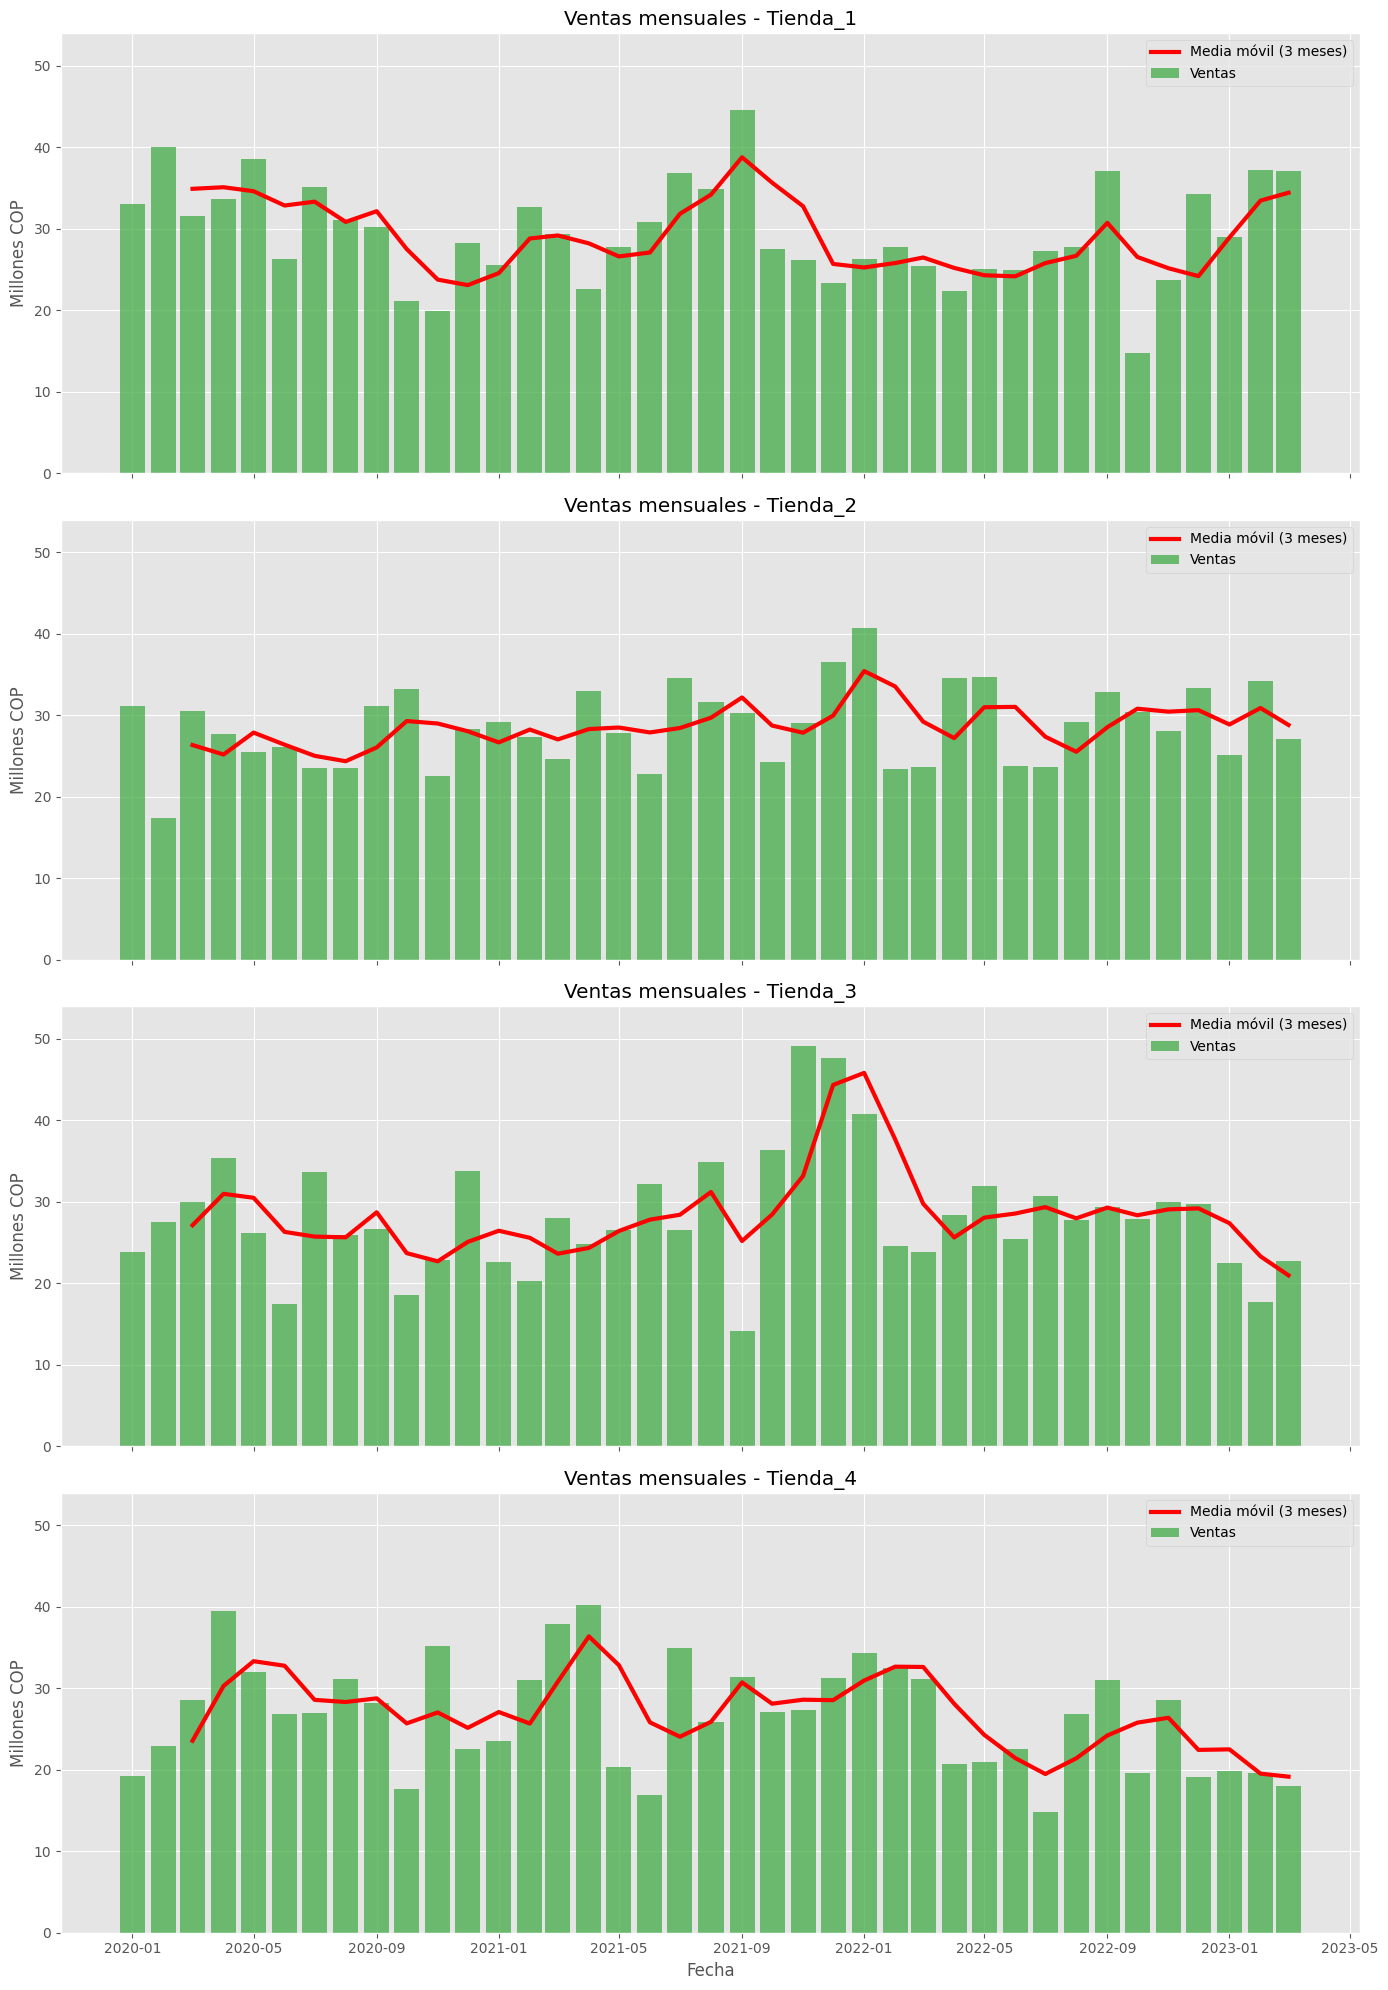

In [74]:
import matplotlib.pyplot as plt

# Agrupar ventas por tienda y mes
ventas_mensuales = df_total.groupby(["Tienda", "AñoMes_dt"], observed=True)["Precio"].sum().reset_index()
ventas_mensuales["Precio_millones"] = ventas_mensuales["Precio"] / 1_000_000

# Obtener el mismo eje Y máximo para todos los gráficos
y_max = ventas_mensuales["Precio_millones"].max() * 1.1  # un poco más para dar aire visual

# Lista de tiendas
tiendas = ventas_mensuales["Tienda"].unique()
fig, axs = plt.subplots(len(tiendas), 1, figsize=(14, 5 * len(tiendas)), sharex=True)

for i, tienda in enumerate(tiendas):
    datos = ventas_mensuales[ventas_mensuales["Tienda"] == tienda].copy()
    datos["Media_movil"] = datos["Precio_millones"].rolling(window=3).mean()

    ax = axs[i]
    # Barras más gruesas (ajustamos el ancho con width)
    ax.bar(datos["AñoMes_dt"], datos["Precio_millones"], label="Ventas",
           color="#4CAF50", alpha=0.8, width=25)  # width en días (como usamos fechas)

    ax.plot(datos["AñoMes_dt"], datos["Media_movil"], label="Media móvil (3 meses)",
            color="red", linewidth=3)

    ax.set_title(f"Ventas mensuales - {tienda}")
    ax.set_ylabel("Millones COP")
    ax.set_ylim(0, y_max)
    ax.grid(True)
    ax.legend()

axs[-1].set_xlabel("Fecha")
plt.tight_layout()
plt.show()


# Analisis Ventas por Categorias

In [75]:
# Asegurarse que la columna 'Año' existe
df_total["Año"] = pd.to_datetime(df_total["Fecha de Compra"], dayfirst=True).dt.year

# Agrupar ventas por Año y Categoría
ventas_categoria_anual = df_total.groupby(["Año", "Categoría del Producto"], observed=True)["Precio"].sum().reset_index()

# Convertir a millones
ventas_categoria_anual["Precio_millones"] = ventas_categoria_anual["Precio"] / 1_000_000

# Pivotear: Categoría como índice, Años como columnas
pivot_cat = ventas_categoria_anual.pivot(index="Categoría del Producto", columns="Año", values="Precio_millones").fillna(0)

# Agregar columna de total y ordenar por ella (de mayor a menor)
pivot_cat["Total"] = pivot_cat.sum(axis=1)
pivot_cat = pivot_cat.sort_values(by="Total", ascending=False)

# Eliminar columna "Total" para mostrar solo por año
pivot_cat = pivot_cat.drop(columns="Total")

# Formatear valores como pesos colombianos
pivot_cat_fmt = pivot_cat.applymap(lambda x: f"${x:,.2f}M".replace(",", "#").replace(".", ",").replace("#", "."))

# Mostrar tabla
from IPython.display import display
display(pivot_cat_fmt)



<ipython-input-75-360e315a35c0>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_cat_fmt = pivot_cat.applymap(lambda x: f"${x:,.2f}M".replace(",", "#").replace(".", ",").replace("#", "."))


Año,2020,2021,2022,2023
Categoría del Producto,,,,
Electrónicos,"$496,08M","$559,41M","$486,30M","$118,78M"
Electrodomésticos,"$423,74M","$435,33M","$386,63M","$79,05M"
Muebles,"$231,40M","$227,57M","$235,76M","$62,93M"
Instrumentos musicales,"$93,45M","$111,72M","$119,38M","$24,22M"
Deportes y diversión,"$45,83M","$39,16M","$45,91M","$12,07M"
Juguetes,"$21,95M","$21,98M","$24,18M","$5,49M"
Artículos para el hogar,"$17,85M","$17,13M","$18,40M","$4,21M"
Libros,"$11,65M","$11,81M","$10,90M","$3,34M"


Resumen de Ventas por categorias y tiendas.

In [76]:
def resumen_por_tienda(tienda):
    df_tienda = df_total[df_total["Tienda"] == tienda].copy()
    df_tienda["PrecioMillones"] = df_tienda["Precio"] / 1_000_000

    tabla = pd.pivot_table(
        df_tienda,
        values="PrecioMillones",
        index="Categoría del Producto",
        columns="Año",
        aggfunc="sum",
        fill_value=0,
        observed=True
    )

    tabla = tabla[sorted(tabla.columns)]  # Ordenar columnas (años)

    # Ordenar las categorías por el total acumulado (suma en las filas)
    tabla["Total"] = tabla.sum(axis=1)
    tabla = tabla.sort_values("Total", ascending=False)
    tabla.drop(columns="Total", inplace=True)

    # Agregar fila de totales generales
    totales = pd.DataFrame(tabla.sum()).T
    totales.index = ["Total General"]
    tabla = pd.concat([tabla, totales])

    # Formatear a texto en millones con separadores y decimales en formato colombiano
    tabla_formateada = tabla.apply(lambda col: col.map(lambda x: f"${x:,.2f}M".replace(",", "#").replace(".", ",").replace("#", ".")))

    return tabla_formateada


    # Mostrar tabla para cada tienda con totales incluidos
for tienda in sorted(df_total["Tienda"].unique()):
    print(f"\n📊 {tienda}")
    display(resumen_por_tienda(tienda))




📊 Tienda_1


Año,2020,2021,2022,2023
Electrónicos,"$129,73M","$145,94M","$106,46M","$47,36M"
Electrodomésticos,"$136,13M","$107,35M","$95,57M","$24,63M"
Muebles,"$50,78M","$59,76M","$57,18M","$19,91M"
Instrumentos musicales,"$26,17M","$27,52M","$31,61M","$5,99M"
Deportes y diversión,"$13,53M","$8,89M","$14,44M","$2,44M"
Juguetes,"$5,15M","$5,70M","$5,96M","$1,19M"
Artículos para el hogar,"$4,57M","$4,39M","$2,95M","$0,79M"
Libros,"$2,88M","$2,57M","$2,39M","$0,94M"
Total General,"$368,93M","$362,12M","$316,57M","$103,26M"



📊 Tienda_2


Año,2020,2021,2022,2023
Electrónicos,"$105,71M","$128,89M","$141,26M","$34,97M"
Electrodomésticos,"$112,44M","$112,26M","$101,89M","$21,98M"
Muebles,"$53,59M","$53,35M","$55,40M","$14,09M"
Instrumentos musicales,"$25,47M","$31,90M","$38,51M","$9,11M"
Deportes y diversión,"$11,30M","$12,30M","$8,07M","$3,07M"
Juguetes,"$3,97M","$4,95M","$5,87M","$1,16M"
Artículos para el hogar,"$4,68M","$4,49M","$4,35M","$1,22M"
Libros,"$3,30M","$3,09M","$2,88M","$0,82M"
Total General,"$320,47M","$351,22M","$358,23M","$86,43M"



📊 Tienda_3


Año,2020,2021,2022,2023
Electrónicos,"$124,50M","$131,23M","$140,75M","$14,30M"
Electrodomésticos,"$94,27M","$115,08M","$102,09M","$17,80M"
Muebles,"$63,22M","$61,37M","$60,76M","$15,72M"
Instrumentos musicales,"$17,77M","$30,80M","$21,34M","$7,47M"
Deportes y diversión,"$9,90M","$11,10M","$10,57M","$4,02M"
Juguetes,"$5,45M","$6,23M","$6,21M","$1,51M"
Artículos para el hogar,"$4,03M","$4,23M","$5,70M","$1,11M"
Libros,"$2,57M","$2,92M","$3,02M","$0,99M"
Total General,"$321,71M","$362,95M","$350,44M","$62,92M"



📊 Tienda_4


Año,2020,2021,2022,2023
Electrónicos,"$136,15M","$153,35M","$97,83M","$22,14M"
Electrodomésticos,"$80,89M","$100,64M","$87,09M","$14,64M"
Muebles,"$63,81M","$53,09M","$62,41M","$13,21M"
Instrumentos musicales,"$24,04M","$21,50M","$27,91M","$1,66M"
Deportes y diversión,"$11,10M","$6,88M","$12,82M","$2,55M"
Juguetes,"$7,39M","$5,11M","$6,15M","$1,62M"
Artículos para el hogar,"$4,58M","$4,02M","$5,39M","$1,08M"
Libros,"$2,89M","$3,23M","$2,61M","$0,59M"
Total General,"$330,85M","$347,82M","$302,22M","$57,48M"


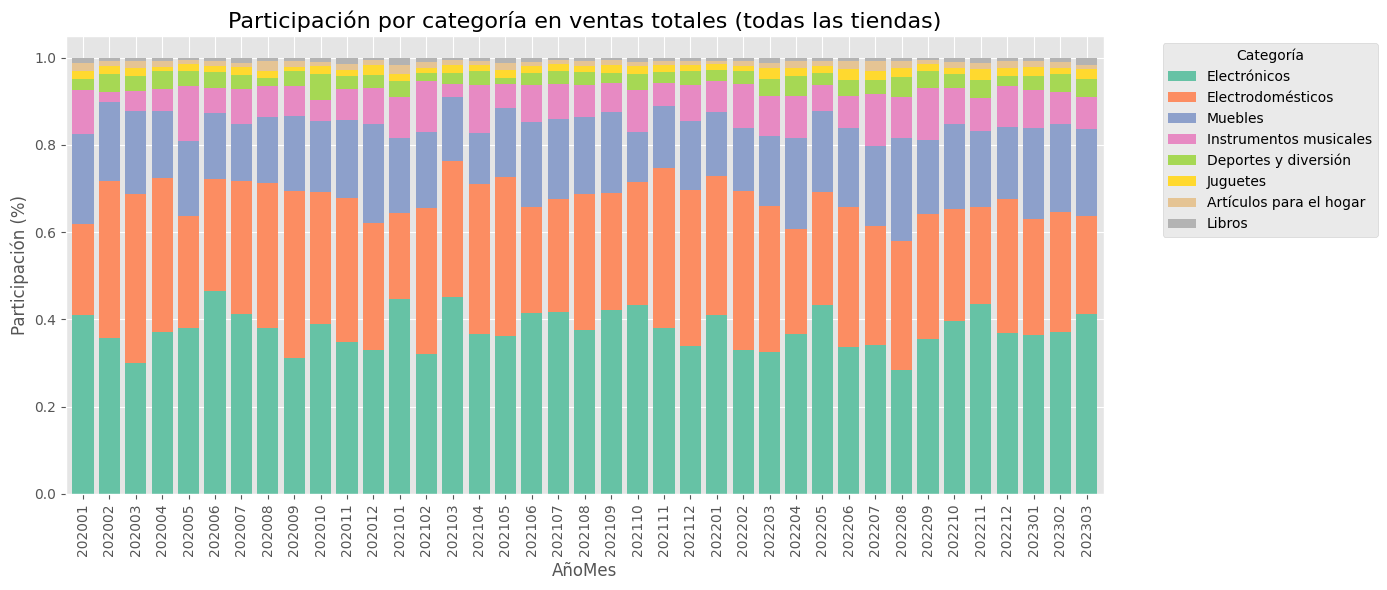

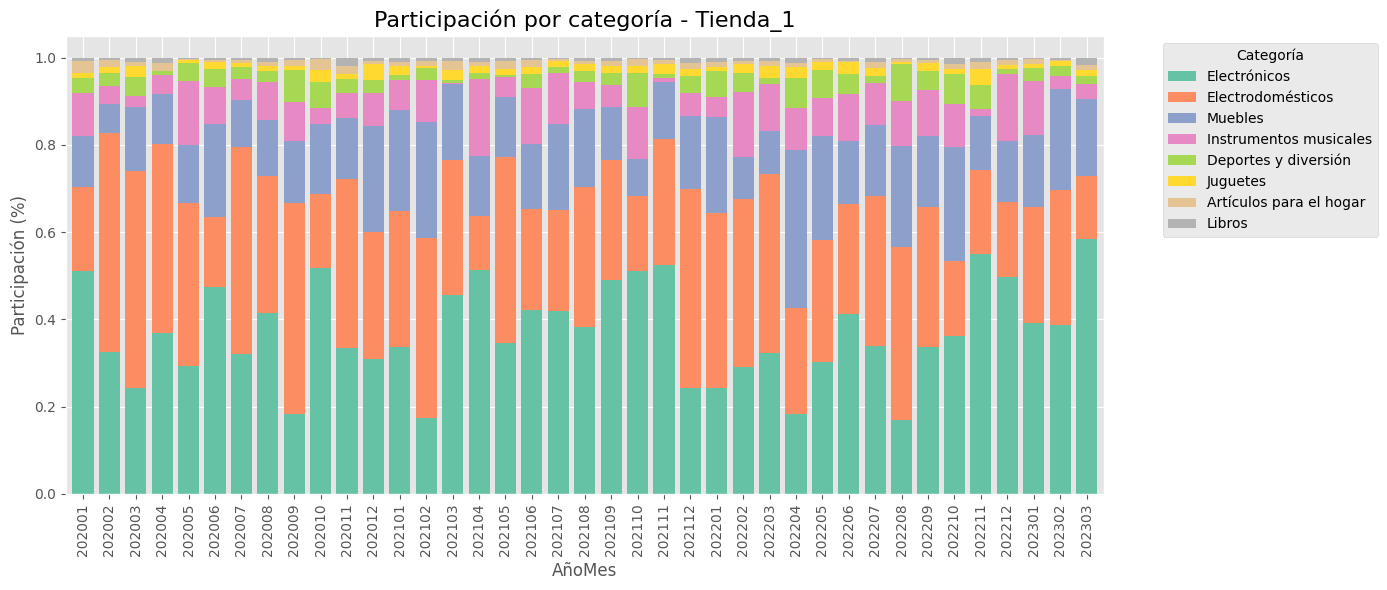

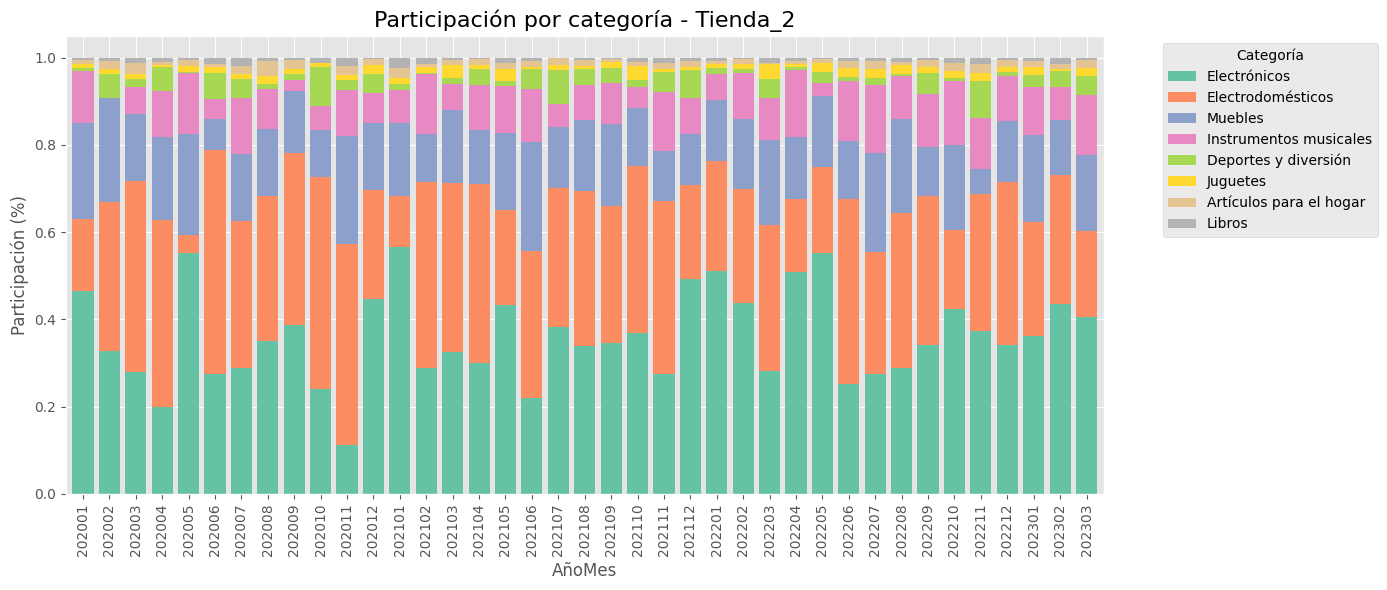

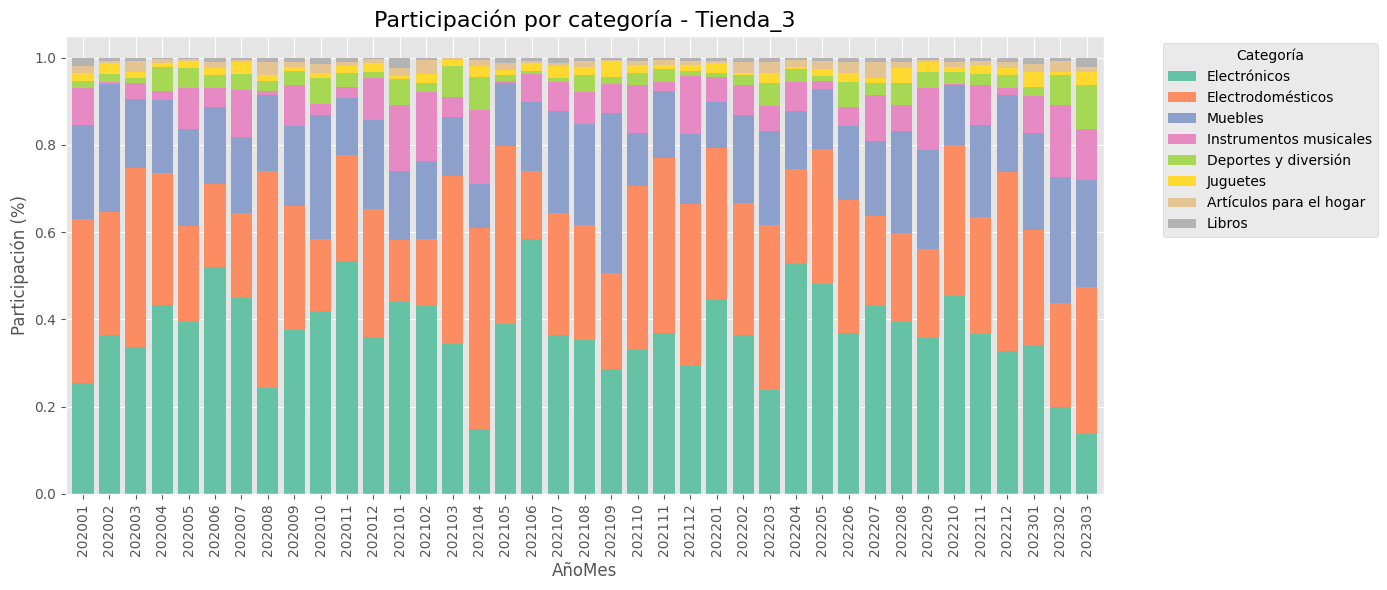

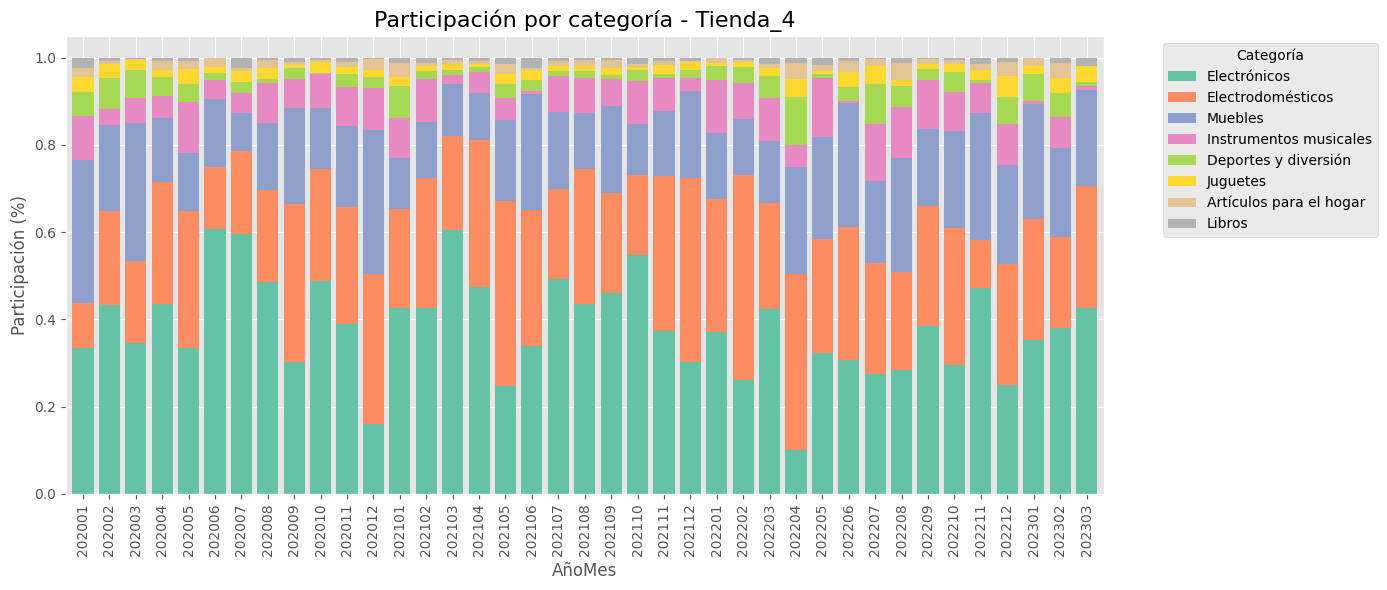

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("Set2")

def grafico_apilado(df, titulo):
    pivot = df.pivot_table(index="AñoMes",
                           columns="Categoría del Producto",
                           values="Precio",
                           aggfunc="sum").fillna(0)
    pivot = pivot.sort_index()

    # Ordenar columnas por total de ventas (de mayor a menor)
    orden_columnas = pivot.sum().sort_values(ascending=False).index
    pivot = pivot[orden_columnas]

    # Crear gráfico apilado normal (las categorías más grandes van abajo)
    ax = pivot.div(pivot.sum(axis=1), axis=0).plot(
        kind="bar", stacked=True, figsize=(14, 6), width=0.8)

    ax.set_title(titulo, fontsize=16)
    ax.set_ylabel("Participación (%)")
    ax.set_xlabel("AñoMes")
    plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# Gráfico total
grafico_apilado(df_total, "Participación por categoría en ventas totales (todas las tiendas)")

# Gráficos por tienda
for tienda in df_total["Tienda"].unique():
    df_tienda = df_total[df_total["Tienda"] == tienda]
    grafico_apilado(df_tienda, f"Participación por categoría - {tienda}")


Calcula el ticket, promedio de la compañia.

In [78]:
import pandas as pd

# Calcular resumen de ticket promedio por categoría
resumen_ticket = df_total.groupby("Categoría del Producto", observed=True).agg(
    Unidades_Vendidas=("Precio", "count"),
    Total_Ventas_COP=("Precio", "sum")
).reset_index()

# Calcular ticket promedio
resumen_ticket["Ticket_Promedio_COP"] = resumen_ticket["Total_Ventas_COP"] / resumen_ticket["Unidades_Vendidas"]

# Ordenar por ticket promedio de mayor a menor
resumen_ticket = resumen_ticket.sort_values("Ticket_Promedio_COP", ascending=False)

# Formatear para visualización
resumen_ticket["Total_Ventas_COP"] = resumen_ticket["Total_Ventas_COP"].apply(lambda x: f"${x:,.0f}")
resumen_ticket["Ticket_Promedio_COP"] = resumen_ticket["Ticket_Promedio_COP"].apply(lambda x: f"${x:,.0f}")

# Mostrar tabla
from IPython.display import display
display(resumen_ticket)


,Categoría del Producto,Unidades_Vendidas,Total_Ventas_COP,Ticket_Promedio_COP
2,Electrodomésticos,1149,"$1,324,751,100","$1,152,960"
3,Electrónicos,1772,"$1,660,576,500","$937,120"
4,Instrumentos musicales,753,"$348,772,600","$463,177"
7,Muebles,1886,"$757,661,000","$401,729"
1,Deportes y diversión,1113,"$142,977,700","$128,462"
0,Artículos para el hogar,730,"$57,579,800","$78,876"
5,Juguetes,1290,"$73,604,400","$57,058"
6,Libros,742,"$37,696,100","$50,803"


In [79]:
import pandas as pd
from IPython.display import display, HTML

# Calcular ticket promedio por tienda, categoría y trimestre
resumen = df_total.groupby(["Tienda", "Trimestre", "Categoría del Producto"], observed=True).agg(
    Unidades_Vendidas=("Precio", "count"),
    Total_Ventas_COP=("Precio", "sum")
).reset_index()

resumen["Ticket_Promedio_COP"] = resumen["Total_Ventas_COP"] / resumen["Unidades_Vendidas"]

# Top 4 categorías por tienda según promedio acumulado
top4 = (
    resumen.groupby(["Tienda", "Categoría del Producto"])["Ticket_Promedio_COP"]
    .mean()
    .reset_index()
    .sort_values(["Tienda", "Ticket_Promedio_COP"], ascending=[True, False])
    .groupby("Tienda")
    .head(4)
)

# Filtrar resumen por top 4
resumen_top4 = resumen.merge(top4[["Tienda", "Categoría del Producto"]], on=["Tienda", "Categoría del Producto"])

# Crear tabla pivote horizontal
pivot = resumen_top4.pivot_table(
    index=["Tienda", "Categoría del Producto"],
    columns="Trimestre",
    values="Ticket_Promedio_COP",
    aggfunc="mean"
).round(0)

# ✅ CORREGIDO: usar apply + map para evitar FutureWarning
pivot = pivot.apply(lambda col: col.map(lambda x: f"${x:,.0f}" if pd.notnull(x) else "-"))

# Mostrar tabla
display(HTML("<h3>Top 4 Categorías por Tienda - Ticket Promedio por Trimestre</h3>"))
display(HTML(pivot.reset_index().to_html(index=False)))


Trimestre,Tienda,Categoría del Producto,2020 T1,2020 T2,2020 T3,2020 T4,2021 T1,2021 T2,2021 T3,2021 T4,2022 T1,2022 T2,2022 T3,2022 T4,2023 T1
,Tienda_1,Electrodomésticos,"$1,174,639","$1,385,225","$1,282,197","$1,029,979","$1,088,864","$989,591","$1,110,228","$1,040,773","$1,314,492","$1,105,253","$1,291,824","$994,846","$1,173,067"
,Tienda_1,Electrónicos,"$988,303","$977,689","$1,024,576","$1,142,865","$923,350","$925,886","$1,075,147","$880,305","$667,779","$731,757","$881,540","$1,039,859","$1,155,232"
,Tienda_1,Instrumentos musicales,"$516,682","$549,441","$475,900","$501,525","$460,073","$539,476","$535,850","$428,982","$505,950","$467,940","$585,481","$419,535","$498,825"
,Tienda_1,Muebles,"$397,814","$441,776","$353,988","$407,053","$417,209","$427,381","$401,298","$336,266","$379,921","$431,832","$403,669","$383,440","$432,915"
,Tienda_2,Electrodomésticos,"$1,019,988","$1,194,595","$1,078,677","$1,462,474","$1,067,274","$1,092,124","$1,272,384","$1,143,824","$1,275,705","$1,029,441","$1,171,854","$1,119,792","$955,796"
,Tienda_2,Electrónicos,"$797,258","$1,164,026","$795,647","$966,008","$901,181","$963,357","$957,469","$853,724","$1,297,628","$1,222,754","$815,497","$1,085,503","$971,481"
,Tienda_2,Instrumentos musicales,"$511,709","$450,294","$500,342","$363,406","$408,811","$417,132","$381,795","$450,567","$555,500","$564,771","$585,394","$484,904","$479,589"
,Tienda_2,Muebles,"$433,753","$417,287","$362,088","$448,507","$401,507","$432,797","$373,110","$376,400","$369,011","$405,468","$394,200","$381,709","$402,571"
,Tienda_3,Electrodomésticos,"$1,077,111","$1,097,189","$1,170,730","$1,089,118","$1,071,650","$1,236,286","$1,038,142","$1,342,284","$1,328,291","$1,185,895","$1,124,788","$1,193,072","$1,271,179"
,Tienda_3,Electrónicos,"$794,282","$912,055","$1,258,548","$974,612","$832,215","$911,389","$898,741","$937,534","$865,879","$1,045,316","$1,052,261","$856,297","$510,786"


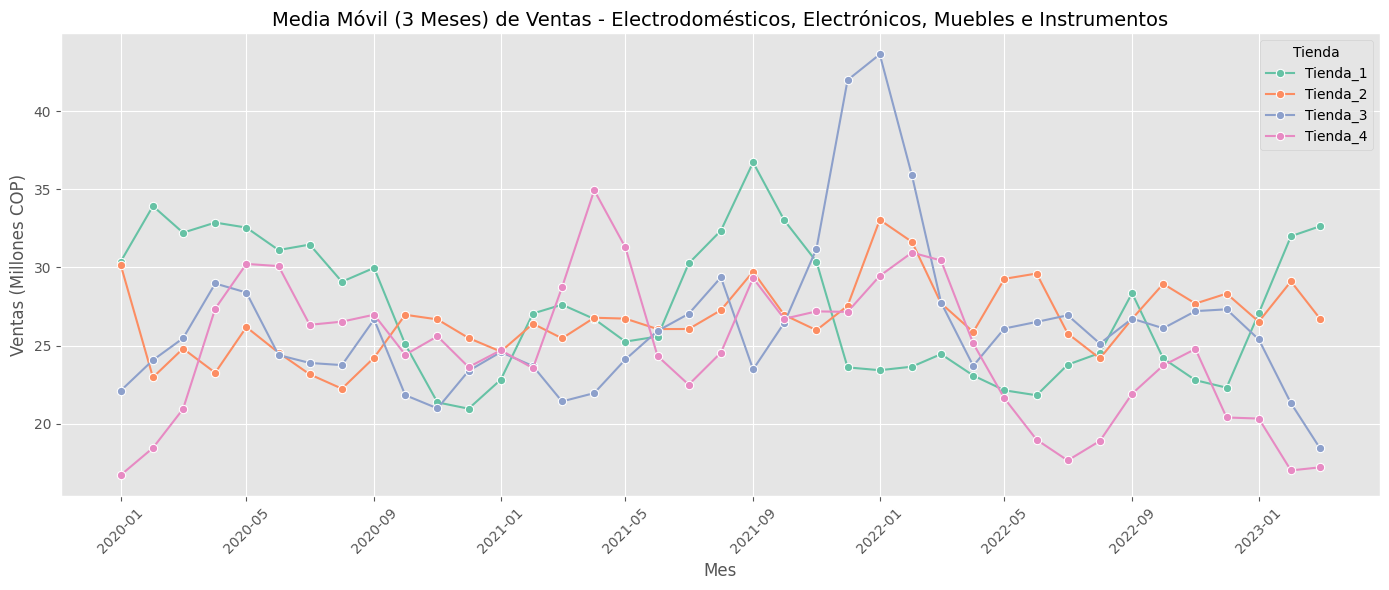

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruir columna AñoMes_dt
df_total["AñoMes"] = pd.to_datetime(df_total["Fecha de Compra"], dayfirst=True).dt.to_period("M").astype(str).str.replace("-", "")
df_total["AñoMes_dt"] = pd.to_datetime(df_total["AñoMes"], format="%Y%m")

# Filtrar categorías seleccionadas
categorias = ["Electrodomésticos", "Electrónicos", "Instrumentos musicales", "Muebles"]
df_filtrado = df_total[df_total["Categoría del Producto"].isin(categorias)].copy()

# Calcular precios en millones
df_filtrado["PrecioMillones"] = df_filtrado["Precio"] / 1_000_000

# Agrupar ventas por tienda y mes
ventas_mensuales = df_filtrado.groupby(["Tienda", "AñoMes_dt"], observed=True)["PrecioMillones"].sum().reset_index()

# Ordenar y calcular media móvil de 3 meses
ventas_mensuales = ventas_mensuales.sort_values(by=["Tienda", "AñoMes_dt"])
ventas_mensuales["MediaMovil_3M"] = ventas_mensuales.groupby("Tienda")["PrecioMillones"].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Crear gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_mensuales, x="AñoMes_dt", y="MediaMovil_3M", hue="Tienda", marker="o")

plt.title("Media Móvil (3 Meses) de Ventas - Electrodomésticos, Electrónicos, Muebles e Instrumentos", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Ventas (Millones COP)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



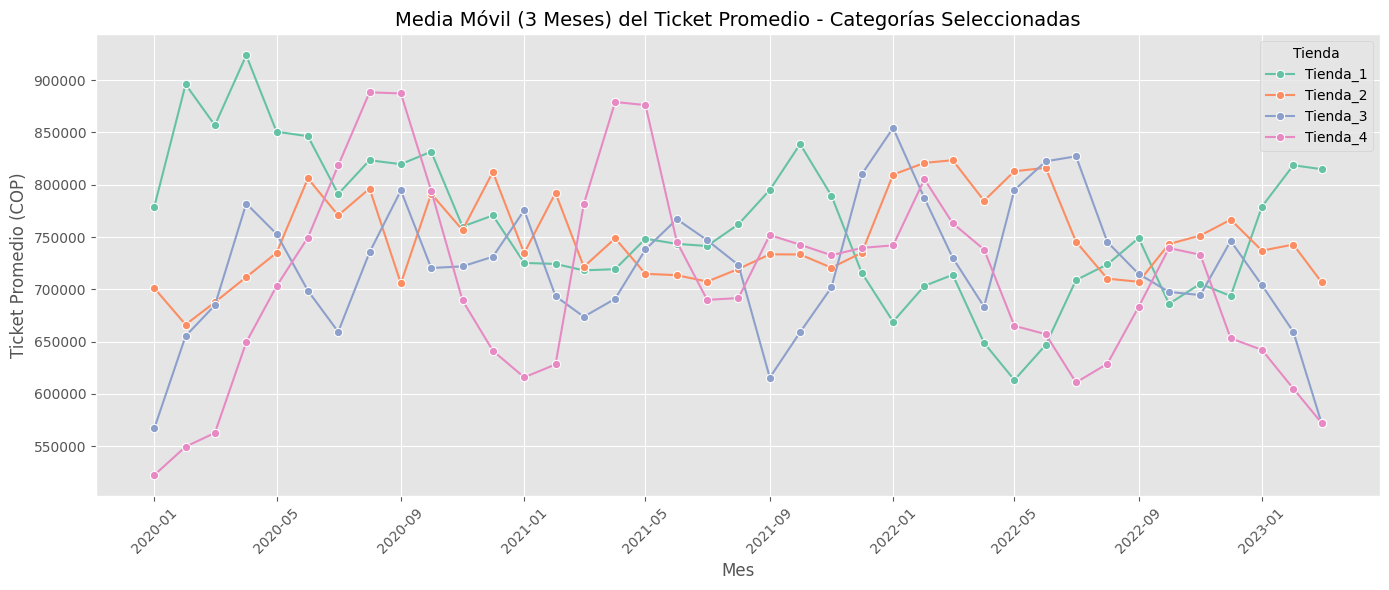

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesar fechas y AñoMes_dt
df_total["Fecha de Compra"] = pd.to_datetime(df_total["Fecha de Compra"], dayfirst=True)
df_total["AñoMes"] = df_total["Fecha de Compra"].dt.strftime('%Y%m')
df_total["AñoMes_dt"] = pd.to_datetime(df_total["AñoMes"], format="%Y%m")

# Filtrar las categorías clave
categorias = ["Electrodomésticos", "Electrónicos", "Instrumentos musicales", "Muebles"]
df_filtrado = df_total[df_total["Categoría del Producto"].isin(categorias)].copy()

# Calcular ticket promedio mensual por tienda
ticket_mensual = df_filtrado.groupby(["Tienda", "AñoMes_dt"], observed=True).agg(
    Total_Ventas=("Precio", "sum"),
    Total_Unidades=("Precio", "count")
).reset_index()
ticket_mensual["Ticket_Promedio"] = ticket_mensual["Total_Ventas"] / ticket_mensual["Total_Unidades"]

# Calcular media móvil de 3 meses
ticket_mensual = ticket_mensual.sort_values(by=["Tienda", "AñoMes_dt"])
ticket_mensual["MediaMovil_3M"] = ticket_mensual.groupby("Tienda")["Ticket_Promedio"].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=ticket_mensual, x="AñoMes_dt", y="MediaMovil_3M", hue="Tienda", marker="o")

plt.title("Media Móvil (3 Meses) del Ticket Promedio - Categorías Seleccionadas", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Ticket Promedio (COP)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


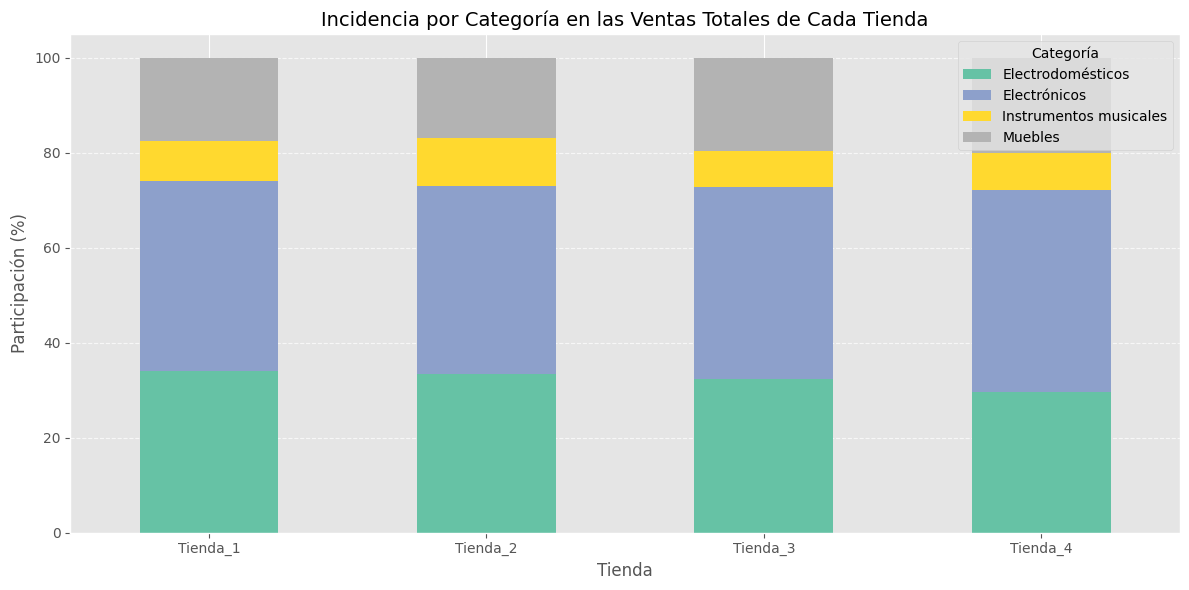

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar categorías seleccionadas
categorias = ["Electrodomésticos", "Electrónicos", "Muebles", "Instrumentos musicales"]
df_categorias = df_total[df_total["Categoría del Producto"].isin(categorias)].copy()

# Calcular ventas totales por tienda
ventas_tienda = df_categorias.groupby("Tienda", observed=True)["Precio"].sum()

# Calcular ventas por tienda y categoría
ventas_por_categoria = df_categorias.groupby(["Tienda", "Categoría del Producto"], observed=True)["Precio"].sum().unstack(fill_value=0)

# Calcular participación porcentual por categoría en cada tienda
participacion = ventas_por_categoria.div(ventas_tienda, axis=0) * 100

# Crear gráfico de barras apiladas
participacion.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set2")

plt.title("Incidencia por Categoría en las Ventas Totales de Cada Tienda", fontsize=14)
plt.ylabel("Participación (%)")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.legend(title="Categoría")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Análisis, Calificacion de tiendas

In [83]:
# Tabla 1: Promedio de calificación por tienda
tabla1 = df_total.groupby("Tienda", observed=True)["Calificación"].agg(
    Promedio_Calificacion="mean",
    Cantidad_Respuestas="count"
).sort_values("Promedio_Calificacion", ascending=False).round(2)

# Tabla 2: Promedio de calificación y ticket promedio por categoría (todas las tiendas)
tabla2 = df_total.groupby("Categoría del Producto", observed=True).agg(
    Promedio_Calificacion=("Calificación", "mean"),
    Cantidad_Respuestas=("Calificación", "count"),
    Ticket_Promedio=("Precio", "mean")
).sort_values("Promedio_Calificacion", ascending=False).round(2)

tabla2_formatted = tabla2.copy()
tabla2_formatted["Ticket_Promedio"] = tabla2_formatted["Ticket_Promedio"].apply(lambda x: f"${x:,.0f}")

# Tabla 3: Promedio de calificación y ticket promedio por categoría y tienda
tabla3 = df_total.groupby(["Tienda", "Categoría del Producto"], observed=True).agg(
    Promedio_Calificacion=("Calificación", "mean"),
    Cantidad_Respuestas=("Calificación", "count"),
    Ticket_Promedio=("Precio", "mean")
).sort_values(["Tienda", "Promedio_Calificacion"], ascending=[True, False]).round(2)

tabla3_formatted = tabla3.copy()
tabla3_formatted["Ticket_Promedio"] = tabla3_formatted["Ticket_Promedio"].apply(lambda x: f"${x:,.0f}")

# Mostrar tablas
display(HTML("<h3>1. Promedio de Calificación por Tienda</h3>"))
display(tabla1)

display(HTML("<h3>2. Promedio de Calificación y Ticket Promedio por Categoría (Total Tiendas)</h3>"))
display(tabla2_formatted)

display(HTML("<h3>3. Promedio de Calificación y Ticket Promedio por Categoría y Tienda</h3>"))
display(tabla3_formatted)



,Promedio_Calificacion,Cantidad_Respuestas
Tienda,,
Tienda_3,4.05,2359
Tienda_2,4.04,2359
Tienda_4,4.00,2358
Tienda_1,3.98,2359


,Promedio_Calificacion,Cantidad_Respuestas,Ticket_Promedio
Categoría del Producto,,,
Juguetes,4.07,1290,"$57,058"
Muebles,4.03,1886,"$401,729"
Electrodomésticos,4.01,1149,"$1,152,960"
Libros,4.00,742,"$50,803"
Instrumentos musicales,4.00,753,"$463,177"
Electrónicos,3.99,1772,"$937,120"
Deportes y diversión,3.99,1113,"$128,462"
Artículos para el hogar,3.98,730,"$78,876"


Promedio_Calificacion  Cantidad_Respuestas  \
Tienda   Categoría del Producto                                                
Tienda_1 Juguetes                                  4.08                  324   
         Instrumentos musicales                    4.05                  182   
         Electrodomésticos                         4.03                  312   
         Electrónicos                              4.00                  448   
         Libros                                    3.98                  173   
         Muebles                                   3.95                  465   
         Deportes y diversión                      3.90                  284   
         Artículos para el hogar                   3.75                  171   
Tienda_2 Muebles                                   4.09                  442   
         Electrodomésticos                         4.07                  305   
         Artículos para el hogar                   4.07                  181   
         Deportes y diversión                      4.07                  275   
         Instrumentos musicales                    4.04                  224   
         Juguetes                                  4.03                  313   
         Electrónicos                              3.97                  422   
         Libros                                    3.95                  197   
Tienda_3 Juguetes                                  4.20                  315   
         Muebles                                   4.10                  499   
         Artículos para el hogar                   4.07                  177   
         Libros                                    4.05                  185   
         Electrodomésticos                         4.01                  278   
         Instrumentos musicales                    4.01                  177   
         Electrónicos                              3.99                  451   
         Deportes y diversión                      3.94                  277   
Tienda_4 Deportes y diversión                      4.05                  277   
         Libros                                    4.04                  187   
         Artículos para el hogar                   4.01                  201   
         Electrónicos                              4.01                  451   
         Muebles                                   4.00                  480   
         Juguetes                                  3.99                  338   
         Electrodomésticos                         3.93                  254   
         Instrumentos musicales                    3.91                  170   

                                 Ticket_Promedio  
Tienda   Categoría del Producto                   
Tienda_1 Juguetes                        $55,542  
         Instrumentos musicales         $501,643  
         Electrodomésticos            $1,165,658  
         Electrónicos                   $958,691  
         Libros                          $50,780  
         Muebles                        $403,513  
         Deportes y diversión           $138,345  
         Artículos para el hogar         $74,260  
Tienda_2 Muebles                        $399,155  
         Electrodomésticos            $1,142,845  
         Artículos para el hogar         $81,475  
         Deportes y diversión           $126,344  
         Instrumentos musicales         $468,707  
         Juguetes                        $50,944  
         Electrónicos                   $973,533  
         Libros                          $51,224  
Tienda_3 Juguetes                        $61,591  
         Muebles                        $402,950  
         Artículos para el hogar         $85,085  
         Libros                          $51,344  
         Electrodomésticos            $1,184,309  
         Instrumentos musicales         $437,180  
         Electrónicos                   $910,811  
         Deportes y diversión         

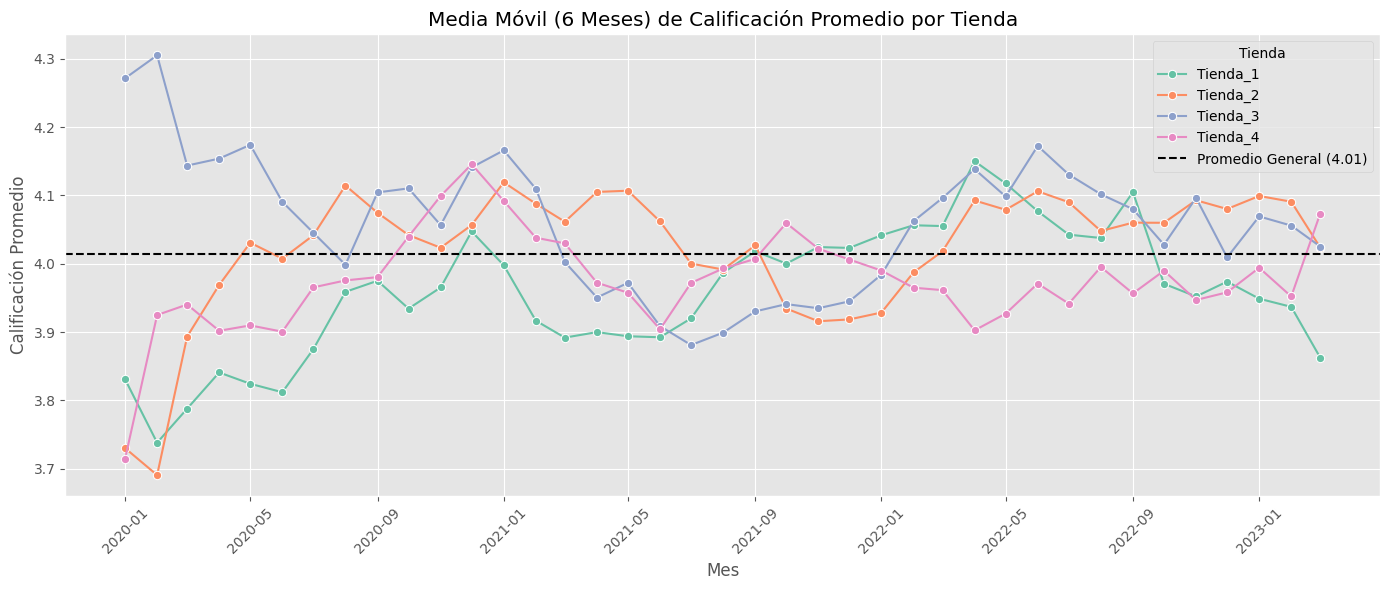

In [84]:
# Procesar fechas
df_total["Fecha de Compra"] = pd.to_datetime(df_total["Fecha de Compra"], dayfirst=True)
df_total["AñoMes"] = df_total["Fecha de Compra"].dt.to_period("M").dt.to_timestamp()

# Calificación promedio mensual por tienda
calif_mensual = df_total.groupby(["Tienda", "AñoMes"], observed=True)["Calificación"].mean().reset_index()

# Media móvil de 6 meses
calif_mensual = calif_mensual.sort_values(by=["Tienda", "AñoMes"])
calif_mensual["MediaMovil_6M"] = calif_mensual.groupby("Tienda")["Calificación"].transform(
    lambda x: x.rolling(window=6, min_periods=1).mean()
)

# Calcular promedio general
promedio_general = df_total["Calificación"].mean()

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=calif_mensual, x="AñoMes", y="MediaMovil_6M", hue="Tienda", marker="o")
plt.axhline(promedio_general, color="black", linestyle="--", linewidth=1.5, label=f"Promedio General ({promedio_general:.2f})")

plt.title("Media Móvil (6 Meses) de Calificación Promedio por Tienda")
plt.xlabel("Mes")
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.grid(True)
plt.tight_layout()
plt.show()


# Productos mas y menos vendidos

In [85]:
import pandas as pd

# Cargar datos desde GitHub
urls = {
    "Tienda_1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda_2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda_3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda_4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

dataframes = []
for tienda, url in urls.items():
    df = pd.read_csv(url)
    df["Tienda"] = tienda
    dataframes.append(df)

df_total = pd.concat(dataframes, ignore_index=True)

# --- TOP 10 productos más vendidos ---
top_productos_info = df_total.groupby("Producto", observed=True).agg(
    Categoria=("Categoría del Producto", "first"),
    Cantidad_Ventas=("Producto", "count"),
    Ticket_Promedio=("Precio", "mean")
).sort_values("Cantidad_Ventas", ascending=False).head(10).reset_index()
top_productos_info["Ticket_Promedio"] = top_productos_info["Ticket_Promedio"].apply(lambda x: f"${x:,.0f}")

# --- BOTTOM 10 productos menos vendidos ---
bottom_productos_info = df_total.groupby("Producto", observed=True).agg(
    Categoria=("Categoría del Producto", "first"),
    Cantidad_Ventas=("Producto", "count"),
    Ticket_Promedio=("Precio", "mean")
).sort_values("Cantidad_Ventas", ascending=True).head(10).reset_index()
bottom_productos_info["Ticket_Promedio"] = bottom_productos_info["Ticket_Promedio"].apply(lambda x: f"${x:,.0f}")

# --- TOP 5 productos por tienda ---
top5_por_tienda_info = df_total.groupby(["Tienda", "Producto"], observed=True).agg(
    Categoria=("Categoría del Producto", "first"),
    Cantidad_Ventas=("Producto", "count"),
    Ticket_Promedio=("Precio", "mean")
).reset_index()

top5_por_tienda_info = top5_por_tienda_info.sort_values(["Tienda", "Cantidad_Ventas"], ascending=[True, False])
top5_por_tienda_info = top5_por_tienda_info.groupby("Tienda").head(5).reset_index(drop=True)
top5_por_tienda_info["Ticket_Promedio"] = top5_por_tienda_info["Ticket_Promedio"].apply(lambda x: f"${x:,.0f}")

# Mostrar resultados
from IPython.display import display, HTML

display(HTML("<h3>Top 10 Productos Más Vendidos</h3>"))
display(top_productos_info)

display(HTML("<h3>Bottom 10 Productos Menos Vendidos</h3>"))
display(bottom_productos_info)

display(HTML("<h3>Top 5 Productos por Tienda</h3>"))
display(top5_por_tienda_info)


,Producto,Categoria,Cantidad_Ventas,Ticket_Promedio
0,Mesa de noche,Muebles,210,"$278,188"
1,Microondas,Electrodomésticos,206,"$561,648"
2,Carrito de control remoto,Juguetes,206,"$71,688"
3,Batería,Instrumentos musicales,203,"$728,110"
4,Cama king,Muebles,201,"$675,524"
5,Modelado predictivo,Libros,200,"$63,080"
6,Secadora de ropa,Electrodomésticos,200,"$1,051,190"
7,Set de ollas,Artículos para el hogar,200,"$152,532"
8,Cama box,Muebles,199,"$523,105"
9,Bloques de construcción,Juguetes,199,"$34,181"


,Producto,Categoria,Cantidad_Ventas,Ticket_Promedio
0,Celular ABXY,Electrónicos,157,"$1,005,803"
1,Auriculares con micrófono,Electrónicos,158,"$143,978"
2,Mochila,Deportes y diversión,163,"$98,563"
3,Guitarra eléctrica,Instrumentos musicales,165,"$784,272"
4,Ciencia de datos con Python,Libros,166,"$54,434"
5,Asistente virtual,Electrónicos,167,"$206,396"
6,Sillón,Muebles,168,"$242,838"
7,Set de vasos,Artículos para el hogar,169,"$33,043"
8,Olla de presión,Artículos para el hogar,172,"$75,167"
9,Smartwatch,Electrónicos,172,"$174,010"


,Tienda,Producto,Categoria,Cantidad_Ventas,Ticket_Promedio
0,Tienda_1,Armario,Muebles,60,"$491,038"
1,Tienda_1,Microondas,Electrodomésticos,60,"$579,358"
2,Tienda_1,TV LED UHD 4K,Electrónicos,60,"$2,369,170"
3,Tienda_1,Secadora de ropa,Electrodomésticos,58,"$1,018,317"
4,Tienda_1,Bloques de construcción,Juguetes,56,"$33,316"
5,Tienda_2,Iniciando en programación,Libros,65,"$48,120"
6,Tienda_2,Microondas,Electrodomésticos,62,"$583,742"
7,Tienda_2,Batería,Instrumentos musicales,61,"$756,972"
8,Tienda_2,Guitarra acústica,Instrumentos musicales,58,"$321,524"
9,Tienda_2,Pandereta,Instrumentos musicales,58,"$64,226"


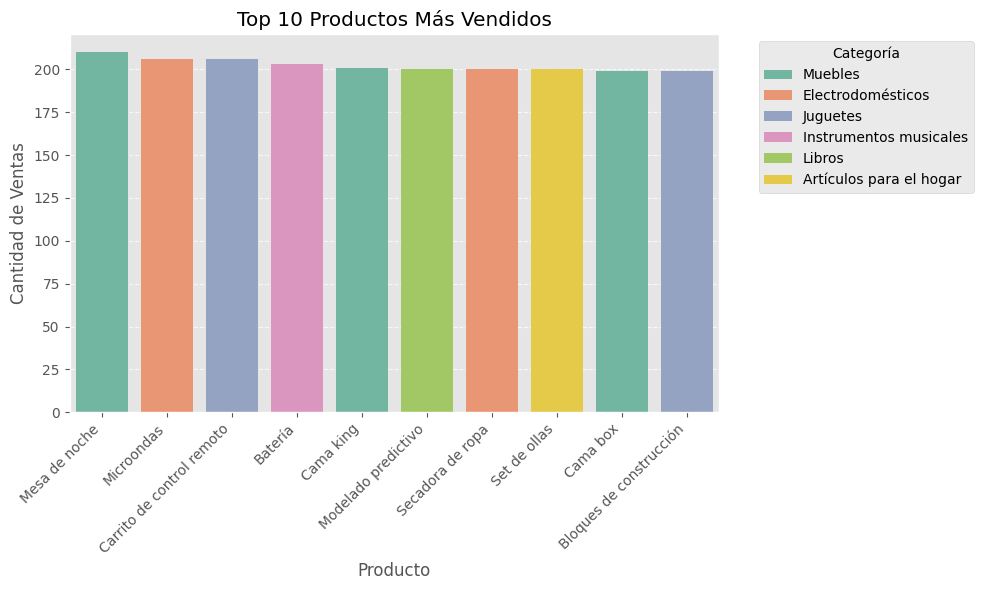

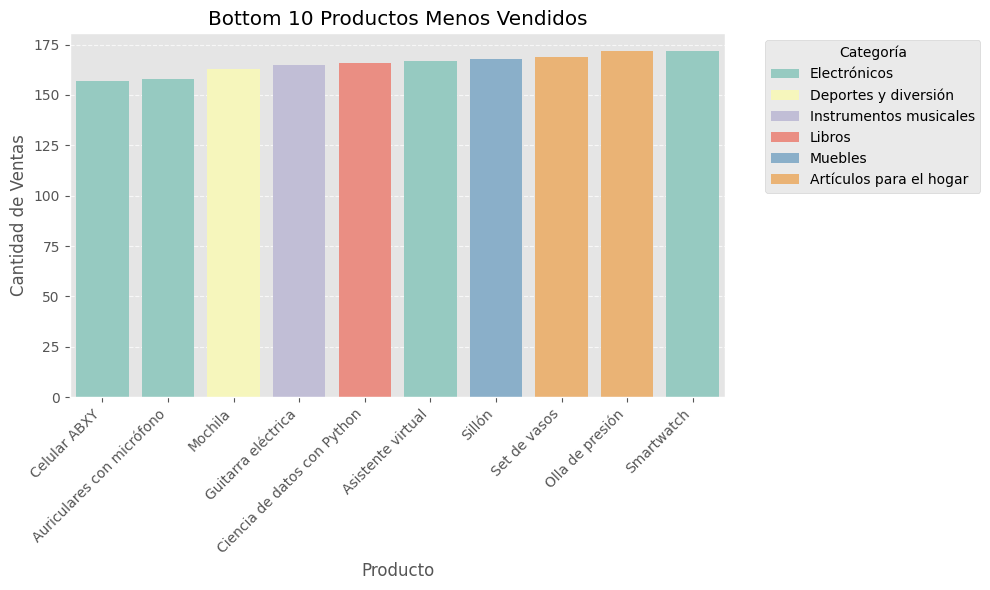

In [86]:

# Preparar datos
top_productos_info = df_total.groupby("Producto", observed=True).agg(
    Categoria=("Categoría del Producto", "first"),
    Cantidad_Ventas=("Producto", "count")
).sort_values("Cantidad_Ventas", ascending=False).head(10).reset_index()

bottom_productos_info = df_total.groupby("Producto", observed=True).agg(
    Categoria=("Categoría del Producto", "first"),
    Cantidad_Ventas=("Producto", "count")
).sort_values("Cantidad_Ventas", ascending=True).head(10).reset_index()

top5_por_tienda_info = df_total.groupby(["Tienda", "Producto"], observed=True).agg(
    Categoria=("Categoría del Producto", "first"),
    Cantidad_Ventas=("Producto", "count")
).reset_index()
top5_por_tienda_info = top5_por_tienda_info.sort_values(["Tienda", "Cantidad_Ventas"], ascending=[True, False])
top5_por_tienda_info = top5_por_tienda_info.groupby("Tienda").head(5).reset_index(drop=True)

# --- Gráfico 1: Top 10 productos más vendidos ---
plt.figure(figsize=(10, 6))
sns.barplot(data=top_productos_info, x="Producto", y="Cantidad_Ventas", hue="Categoria", dodge=False, palette="Set2")
plt.title("Top 10 Productos Más Vendidos")
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- Gráfico 2: Bottom 10 productos menos vendidos ---
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_productos_info, x="Producto", y="Cantidad_Ventas", hue="Categoria", dodge=False, palette="Set3")
plt.title("Bottom 10 Productos Menos Vendidos")
plt.ylabel("Cantidad de Ventas")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()



In [87]:
# Agrupar ventas por producto y tienda
top10_millones = (
    df_total.groupby(["Tienda", "Producto", "Categoría del Producto"], observed=True)
    .agg(
        Cantidad_Ventas=("Producto", "count"),
        Monto_Total=("Precio", "sum")
    )
    .reset_index()
)

# Convertir a millones
top10_millones["Monto_Total"] = (top10_millones["Monto_Total"] / 1_000_000).round(2)

# Ordenar y tomar top 10 por tienda
top10_millones = top10_millones.sort_values(["Tienda", "Monto_Total"], ascending=[True, False])
top10_millones = top10_millones.groupby("Tienda").head(10).reset_index(drop=True)

# Mostrar por tienda
from IPython.display import display, HTML

for tienda in top10_millones["Tienda"].unique():
    display(HTML(f"<h3>Top 10 Productos - {tienda}</h3>"))
    display(top10_millones[top10_millones["Tienda"] == tienda].reset_index(drop=True))


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_1,TV LED UHD 4K,Electrónicos,60,142.15
1,Tienda_1,Refrigerador,Electrodomésticos,54,112.14
2,Tienda_1,Iphone 15,Electrónicos,49,97.90
3,Tienda_1,Smart TV,Electrónicos,44,67.45
4,Tienda_1,Lavadora de ropa,Electrodomésticos,47,65.78
5,Tienda_1,Lavavajillas,Electrodomésticos,48,62.05
6,Tienda_1,Secadora de ropa,Electrodomésticos,58,59.06
7,Tienda_1,Tablet ABXY,Electrónicos,42,47.64
8,Tienda_1,Batería,Instrumentos musicales,53,37.69
9,Tienda_1,Guitarra eléctrica,Instrumentos musicales,47,37.29


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_2,Iphone 15,Electrónicos,55,113.23
1,Tienda_2,TV LED UHD 4K,Electrónicos,45,103.38
2,Tienda_2,Refrigerador,Electrodomésticos,49,97.63
3,Tienda_2,Lavadora de ropa,Electrodomésticos,49,66.76
4,Tienda_2,Smart TV,Electrónicos,40,61.14
5,Tienda_2,Secadora de ropa,Electrodomésticos,57,59.12
6,Tienda_2,Lavavajillas,Electrodomésticos,46,58.77
7,Tienda_2,Tablet ABXY,Electrónicos,44,56.21
8,Tienda_2,Batería,Instrumentos musicales,61,46.18
9,Tienda_2,Celular ABXY,Electrónicos,41,41.67


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_3,Refrigerador,Electrodomésticos,50,99.89
1,Tienda_3,TV LED UHD 4K,Electrónicos,42,96.67
2,Tienda_3,Iphone 15,Electrónicos,46,93.23
3,Tienda_3,Smart TV,Electrónicos,54,78.84
4,Tienda_3,Lavavajillas,Electrodomésticos,52,64.36
5,Tienda_3,Tablet ABXY,Electrónicos,48,58.44
6,Tienda_3,Lavadora de ropa,Electrodomésticos,42,57.46
7,Tienda_3,Secadora de ropa,Electrodomésticos,45,49.80
8,Tienda_3,Celular ABXY,Electrónicos,44,43.42
9,Tienda_3,Cama king,Muebles,56,38.83


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_4,Iphone 15,Electrónicos,48,96.70
1,Tienda_4,TV LED UHD 4K,Electrónicos,40,90.30
2,Tienda_4,Smart TV,Electrónicos,54,82.79
3,Tienda_4,Refrigerador,Electrodomésticos,38,75.27
4,Tienda_4,Tablet ABXY,Electrónicos,45,56.72
5,Tienda_4,Lavavajillas,Electrodomésticos,43,55.35
6,Tienda_4,Lavadora de ropa,Electrodomésticos,38,52.46
7,Tienda_4,Secadora de ropa,Electrodomésticos,40,42.26
8,Tienda_4,Celular ABXY,Electrónicos,39,40.17
9,Tienda_4,Cama king,Muebles,56,37.56


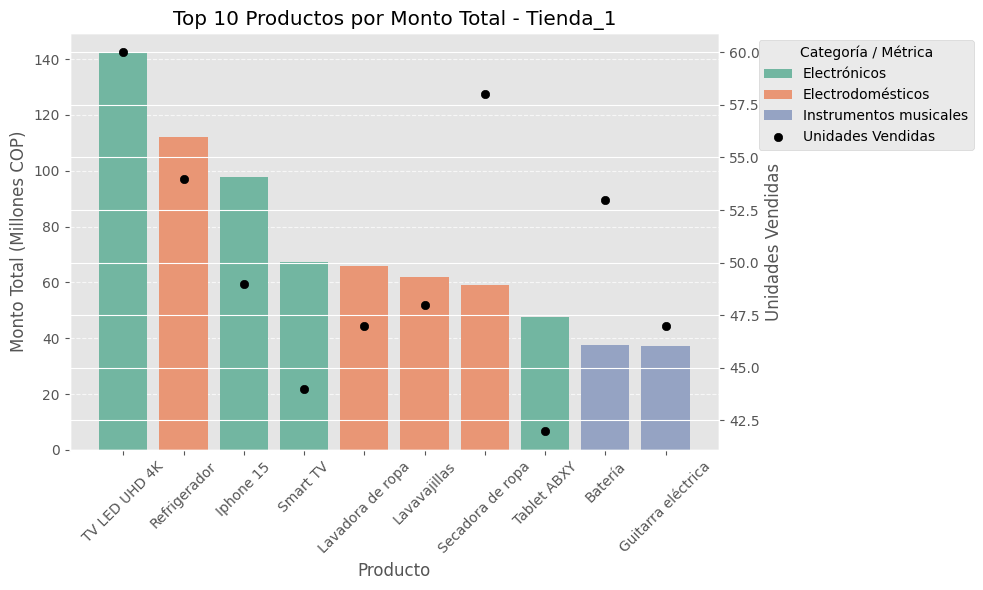

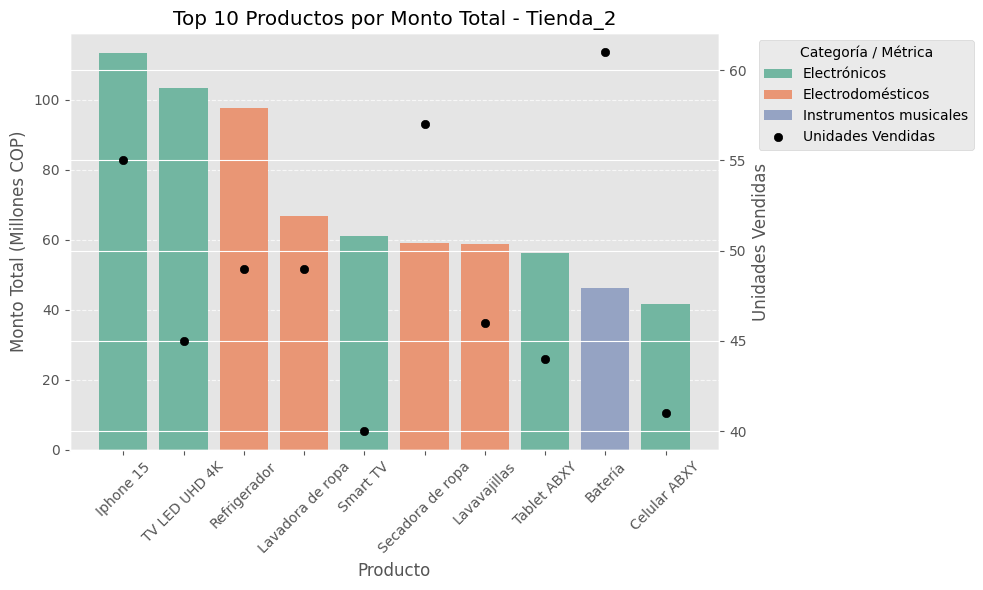

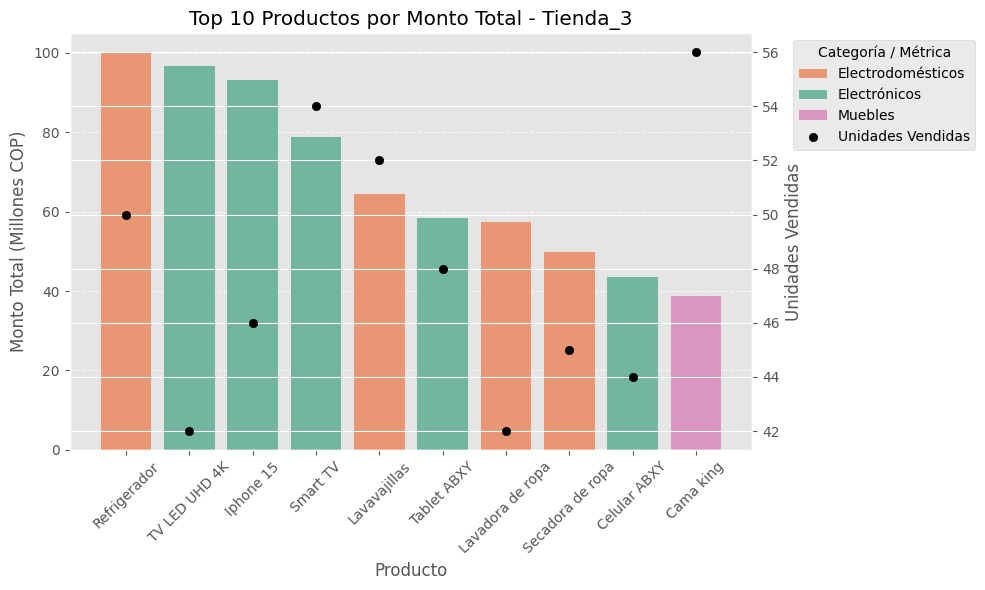

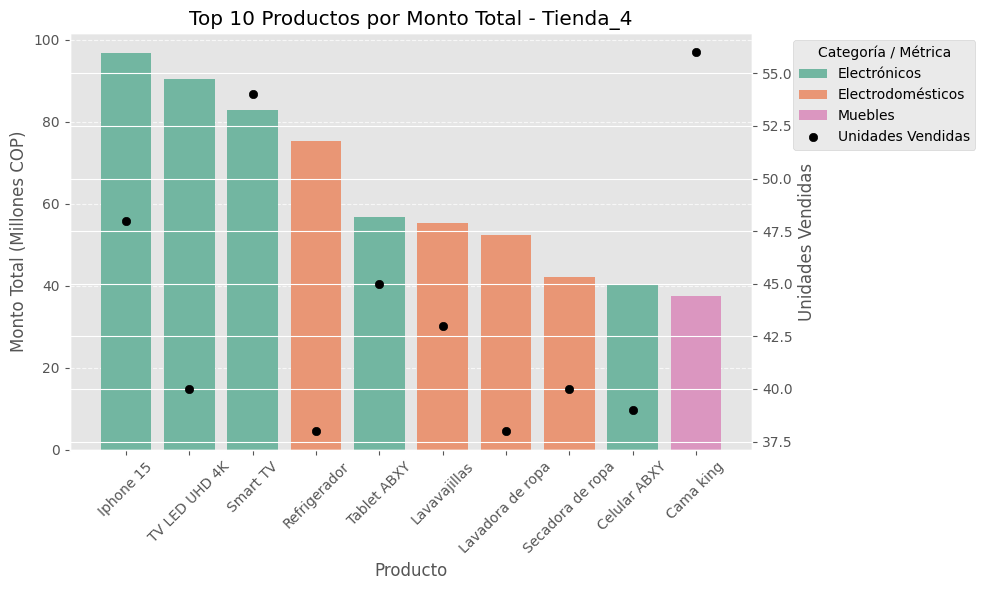

In [88]:
# Agrupar y preparar datos
top10_millones = (
    df_total.groupby(["Tienda", "Producto", "Categoría del Producto"], observed=True)
    .agg(
        Cantidad_Ventas=("Producto", "count"),
        Monto_Total=("Precio", "sum")
    )
    .reset_index()
)

top10_millones["Monto_Total"] = (top10_millones["Monto_Total"] / 1_000_000).round(2)
top10_millones = top10_millones.sort_values(["Tienda", "Monto_Total"], ascending=[True, False])
top10_millones = top10_millones.groupby("Tienda").head(10).reset_index(drop=True)

# Paleta de colores por categoría
categorias = top10_millones["Categoría del Producto"].unique()
palette = dict(zip(categorias, sns.color_palette("Set2", len(categorias))))

# Crear gráficos con segundo eje y sin warning
for tienda in top10_millones["Tienda"].unique():
    df_tienda = top10_millones[top10_millones["Tienda"] == tienda]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.barplot(
        data=df_tienda,
        x="Producto",
        y="Monto_Total",
        hue="Categoría del Producto",
        palette=palette,
        dodge=False,
        ax=ax1
    )

    ax1.set_ylabel("Monto Total (Millones COP)")
    ax1.set_xlabel("Producto")
    ax1.set_title(f"Top 10 Productos por Monto Total - {tienda}")
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Eje secundario con puntos individuales
    ax2 = ax1.twinx()
    ax2.scatter(x=df_tienda["Producto"], y=df_tienda["Cantidad_Ventas"], color='black', marker='o', label="Unidades Vendidas")
    ax2.set_ylabel("Unidades Vendidas")

    # Leyenda combinada
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, title="Categoría / Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()




Analisis de los 10 Menos Vendidos

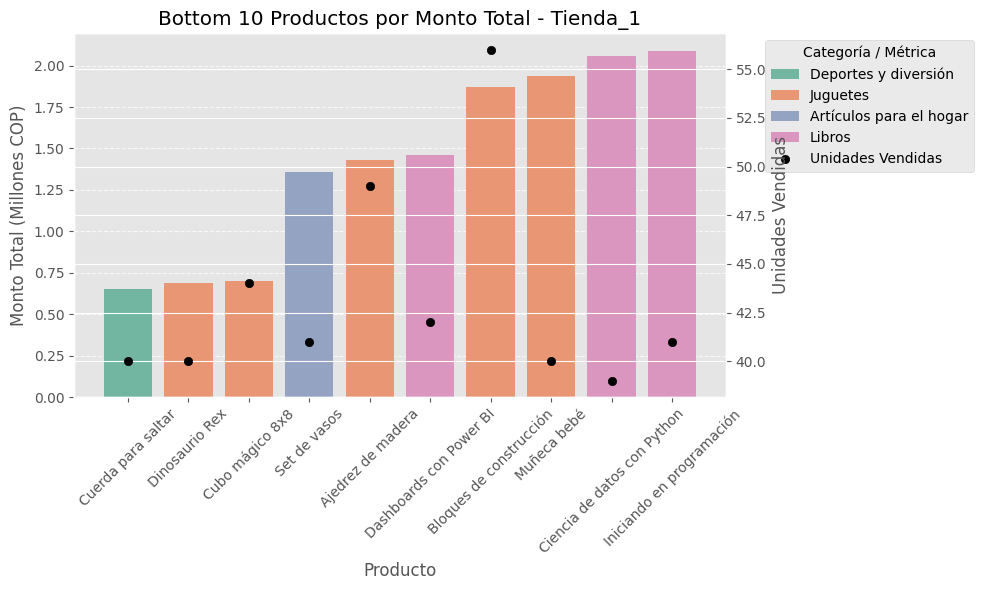

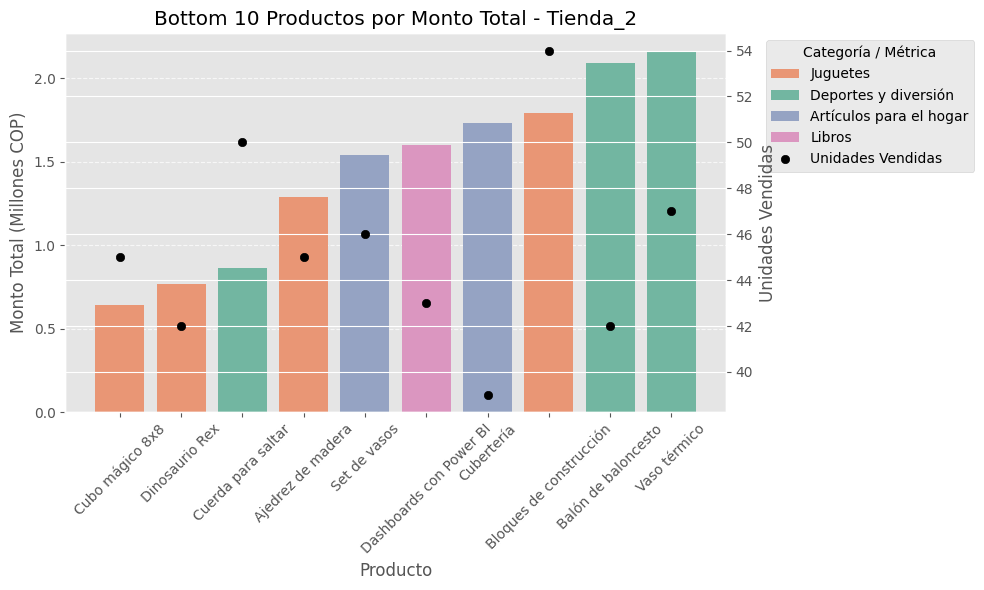

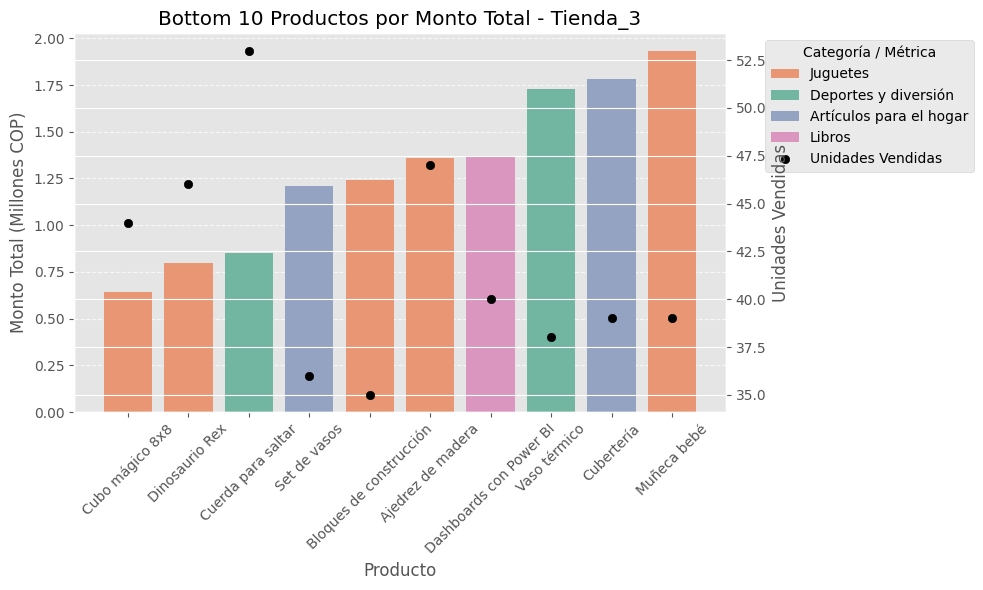

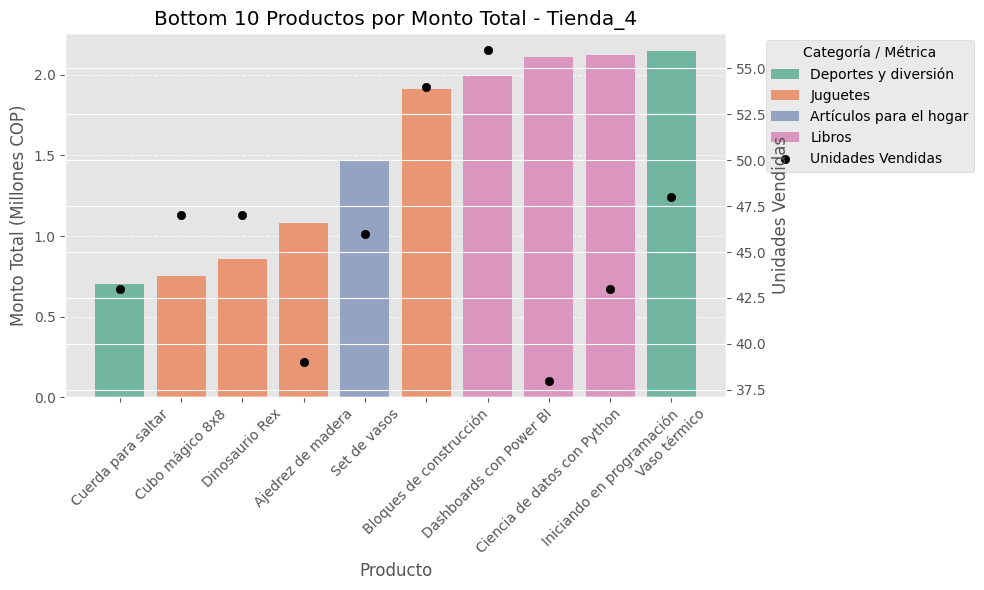

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por tienda y producto
bottom10_millones = (
    df_total.groupby(["Tienda", "Producto", "Categoría del Producto"], observed=True)
    .agg(
        Cantidad_Ventas=("Producto", "count"),
        Monto_Total=("Precio", "sum")
    )
    .reset_index()
)

# Convertir monto a millones
bottom10_millones["Monto_Total"] = (bottom10_millones["Monto_Total"] / 1_000_000).round(2)

# Tomar bottom 10 por tienda
bottom10_millones = bottom10_millones.sort_values(["Tienda", "Monto_Total"], ascending=[True, True])
bottom10_millones = bottom10_millones.groupby("Tienda").head(10).reset_index(drop=True)

# Usar misma paleta si ya está definida
categorias_bottom = bottom10_millones["Categoría del Producto"].unique()
palette_bottom = dict(zip(categorias_bottom, sns.color_palette("Set2", len(categorias_bottom))))

# Crear gráfico por tienda
for tienda in bottom10_millones["Tienda"].unique():
    df_tienda = bottom10_millones[bottom10_millones["Tienda"] == tienda]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.barplot(
        data=df_tienda,
        x="Producto",
        y="Monto_Total",
        hue="Categoría del Producto",
        palette=palette_bottom,
        dodge=False,
        ax=ax1
    )

    ax1.set_ylabel("Monto Total (Millones COP)")
    ax1.set_xlabel("Producto")
    ax1.set_title(f"Bottom 10 Productos por Monto Total - {tienda}")
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Segundo eje con puntos individuales para cantidad
    ax2 = ax1.twinx()
    ax2.scatter(df_tienda["Producto"], df_tienda["Cantidad_Ventas"], color='black', marker='o', label="Unidades Vendidas")
    ax2.set_ylabel("Unidades Vendidas")

    # Leyenda combinada
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, title="Categoría / Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


In [90]:
# Calcular los 10 productos menos vendidos por tienda por monto total
bottom10_millones = (
    df_total.groupby(["Tienda", "Producto", "Categoría del Producto"], observed=True)
    .agg(
        Cantidad_Ventas=("Producto", "count"),
        Monto_Total=("Precio", "sum")
    )
    .reset_index()
)

# Convertir el monto a millones
bottom10_millones["Monto_Total"] = (bottom10_millones["Monto_Total"] / 1_000_000).round(2)

# Ordenar y seleccionar los 10 de menor venta por tienda
bottom10_millones = bottom10_millones.sort_values(["Tienda", "Monto_Total"], ascending=[True, True])
bottom10_millones = bottom10_millones.groupby("Tienda").head(10).reset_index(drop=True)

# Mostrar por tienda
from IPython.display import display, HTML

for tienda in bottom10_millones["Tienda"].unique():
    display(HTML(f"<h3>Bottom 10 Productos - {tienda}</h3>"))
    display(bottom10_millones[bottom10_millones["Tienda"] == tienda].reset_index(drop=True))


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_1,Cuerda para saltar,Deportes y diversión,40,0.65
1,Tienda_1,Dinosaurio Rex,Juguetes,40,0.69
2,Tienda_1,Cubo mágico 8x8,Juguetes,44,0.70
3,Tienda_1,Set de vasos,Artículos para el hogar,41,1.36
4,Tienda_1,Ajedrez de madera,Juguetes,49,1.43
5,Tienda_1,Dashboards con Power BI,Libros,42,1.46
6,Tienda_1,Bloques de construcción,Juguetes,56,1.87
7,Tienda_1,Muñeca bebé,Juguetes,40,1.94
8,Tienda_1,Ciencia de datos con Python,Libros,39,2.06
9,Tienda_1,Iniciando en programación,Libros,41,2.09


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_2,Cubo mágico 8x8,Juguetes,45,0.64
1,Tienda_2,Dinosaurio Rex,Juguetes,42,0.77
2,Tienda_2,Cuerda para saltar,Deportes y diversión,50,0.86
3,Tienda_2,Ajedrez de madera,Juguetes,45,1.29
4,Tienda_2,Set de vasos,Artículos para el hogar,46,1.54
5,Tienda_2,Dashboards con Power BI,Libros,43,1.60
6,Tienda_2,Cubertería,Artículos para el hogar,39,1.73
7,Tienda_2,Bloques de construcción,Juguetes,54,1.79
8,Tienda_2,Balón de baloncesto,Deportes y diversión,42,2.09
9,Tienda_2,Vaso térmico,Deportes y diversión,47,2.16


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_3,Cubo mágico 8x8,Juguetes,44,0.64
1,Tienda_3,Dinosaurio Rex,Juguetes,46,0.80
2,Tienda_3,Cuerda para saltar,Deportes y diversión,53,0.85
3,Tienda_3,Set de vasos,Artículos para el hogar,36,1.21
4,Tienda_3,Bloques de construcción,Juguetes,35,1.24
5,Tienda_3,Ajedrez de madera,Juguetes,47,1.36
6,Tienda_3,Dashboards con Power BI,Libros,40,1.37
7,Tienda_3,Vaso térmico,Deportes y diversión,38,1.73
8,Tienda_3,Cubertería,Artículos para el hogar,39,1.78
9,Tienda_3,Muñeca bebé,Juguetes,39,1.93


,Tienda,Producto,Categoría del Producto,Cantidad_Ventas,Monto_Total
0,Tienda_4,Cuerda para saltar,Deportes y diversión,43,0.70
1,Tienda_4,Cubo mágico 8x8,Juguetes,47,0.75
2,Tienda_4,Dinosaurio Rex,Juguetes,47,0.86
3,Tienda_4,Ajedrez de madera,Juguetes,39,1.08
4,Tienda_4,Set de vasos,Artículos para el hogar,46,1.47
5,Tienda_4,Bloques de construcción,Juguetes,54,1.91
6,Tienda_4,Dashboards con Power BI,Libros,56,1.99
7,Tienda_4,Ciencia de datos con Python,Libros,38,2.11
8,Tienda_4,Iniciando en programación,Libros,43,2.12
9,Tienda_4,Vaso térmico,Deportes y diversión,48,2.15


# Costo de Envios por tienda

In [91]:
# --- Promedio del costo de envío por tienda (ordenado) ---
envio_por_tienda = df_total.groupby("Tienda", observed=True)["Costo de envío"].agg(
    Promedio_Costo_Envio="mean",
    Total_Envios="count"
).reset_index()

envio_por_tienda["Promedio_Costo_Envio_RAW"] = envio_por_tienda["Promedio_Costo_Envio"]
envio_por_tienda["Promedio_Costo_Envio"] = envio_por_tienda["Promedio_Costo_Envio"].round(0).apply(lambda x: f"${x:,.0f}")
envio_por_tienda = envio_por_tienda.sort_values("Promedio_Costo_Envio_RAW", ascending=False).drop(columns=["Promedio_Costo_Envio_RAW"])

# --- Promedio del costo de envío por categoría (ordenado) ---
envio_por_categoria = df_total.groupby("Categoría del Producto", observed=True)["Costo de envío"].agg(
    Promedio_Costo_Envio="mean",
    Total_Envios="count"
).reset_index()

envio_por_categoria["Promedio_Costo_Envio_RAW"] = envio_por_categoria["Promedio_Costo_Envio"]
envio_por_categoria["Promedio_Costo_Envio"] = envio_por_categoria["Promedio_Costo_Envio"].round(0).apply(lambda x: f"${x:,.0f}")
envio_por_categoria = envio_por_categoria.sort_values("Promedio_Costo_Envio_RAW", ascending=False).drop(columns=["Promedio_Costo_Envio_RAW"])

# Mostrar tablas
from IPython.display import display, HTML
display(HTML("<h3>Promedio de Costo de Envío por Tienda (Ordenado)</h3>"))
display(envio_por_tienda)

display(HTML("<h3>Promedio de Costo de Envío por Categoría de Producto (Ordenado)</h3>"))
display(envio_por_categoria)


,Tienda,Promedio_Costo_Envio,Total_Envios
0,Tienda_1,"$26,019",2359
1,Tienda_2,"$25,216",2359
2,Tienda_3,"$24,806",2359
3,Tienda_4,"$23,459",2358


,Categoría del Producto,Promedio_Costo_Envio,Total_Envios
2,Electrodomésticos,"$61,267",1149
3,Electrónicos,"$49,922",1772
4,Instrumentos musicales,"$24,574",753
7,Muebles,"$21,448",1886
1,Deportes y diversión,"$6,911",1113
0,Artículos para el hogar,"$4,262",730
5,Juguetes,"$3,117",1290
6,Libros,"$2,776",742


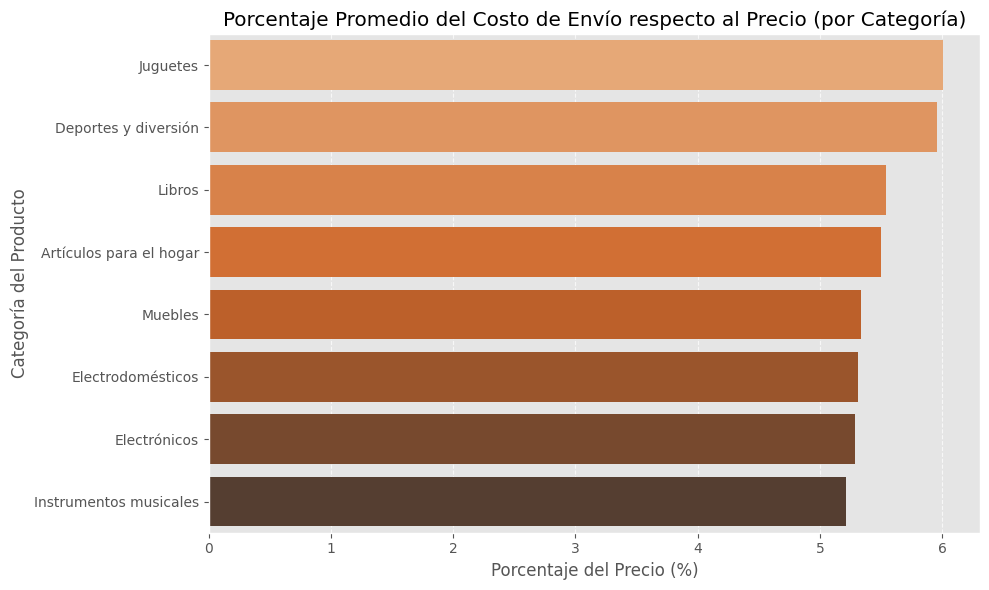

In [92]:
# Filtrar y calcular porcentaje
df_envio = df_total[df_total["Precio"] > 0].copy()
df_envio["Porcentaje_Envio"] = (df_envio["Costo de envío"] / df_envio["Precio"]) * 100

# Agrupar por categoría
porcentaje_envio_categoria = (
    df_envio.groupby("Categoría del Producto", observed=True)["Porcentaje_Envio"]
    .mean()
    .reset_index()
    .sort_values("Porcentaje_Envio", ascending=False)
)
porcentaje_envio_categoria["Porcentaje_Envio"] = porcentaje_envio_categoria["Porcentaje_Envio"].round(2)

# Graficar con hue + legend=False para evitar el warning
plt.figure(figsize=(10, 6))
sns.barplot(
    data=porcentaje_envio_categoria,
    x="Porcentaje_Envio",
    y="Categoría del Producto",
    hue="Categoría del Producto",
    palette="Oranges_d",
    dodge=False,
    legend=False
)
plt.title("Porcentaje Promedio del Costo de Envío respecto al Precio (por Categoría)")
plt.xlabel("Porcentaje del Precio (%)")
plt.ylabel("Categoría del Producto")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


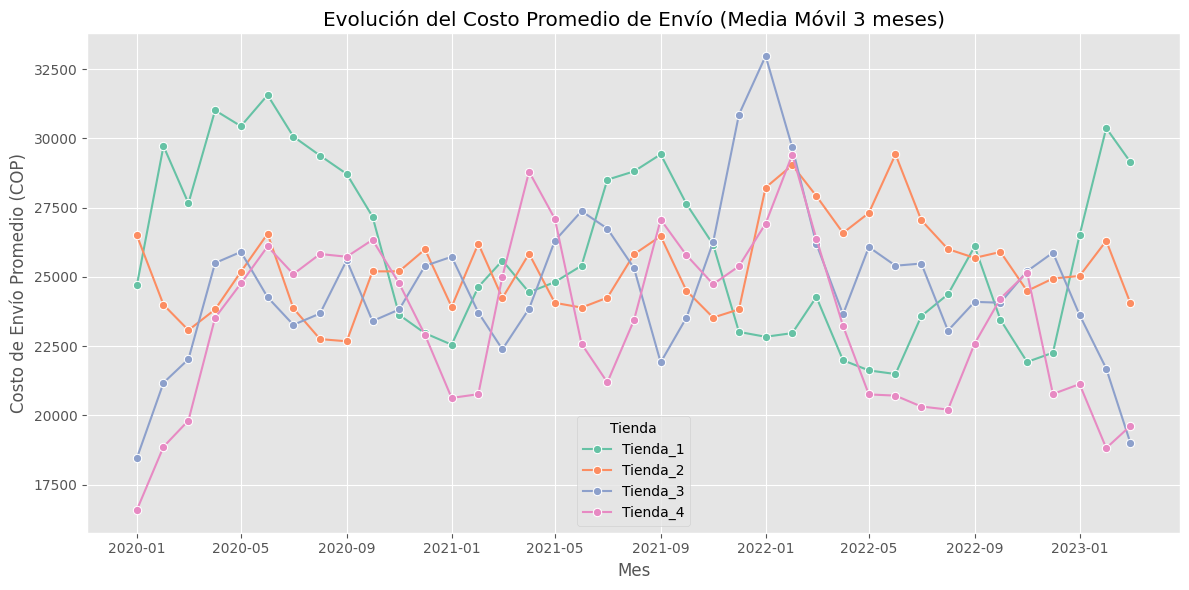

<ipython-input-93-ced1e6d30eba>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envio_por_ciudad, x="Costo de envío", y="Lugar de Compra", palette="Reds_d")


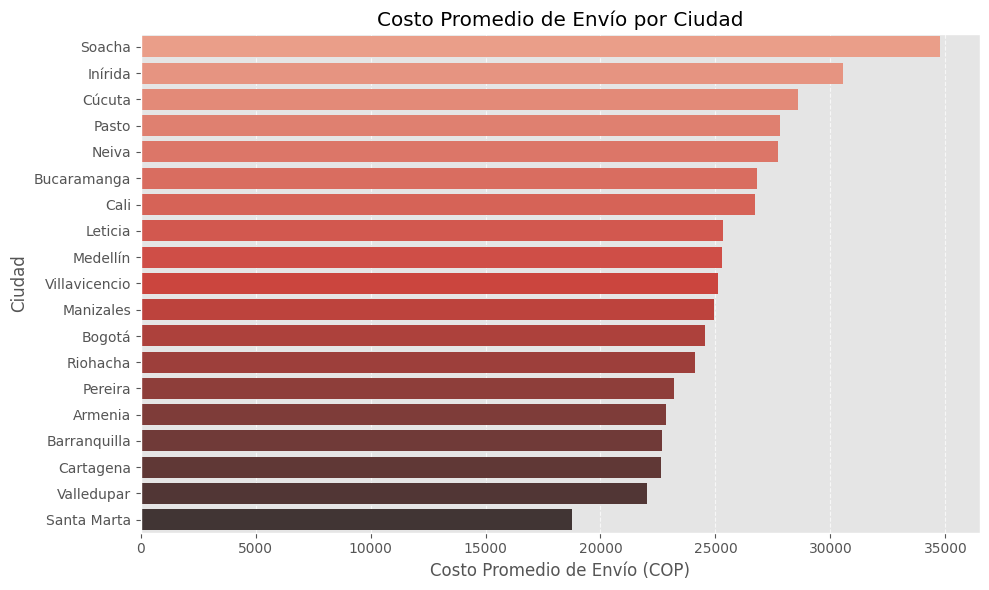

In [93]:
# --- Evolución mensual del costo de envío con media móvil ---
df_total["Fecha de Compra"] = pd.to_datetime(df_total["Fecha de Compra"], dayfirst=True)
df_total["AñoMes"] = df_total["Fecha de Compra"].dt.to_period("M").dt.to_timestamp()

# Agrupar por tienda y mes
envio_mensual = (
    df_total.groupby(["Tienda", "AñoMes"], observed=True)["Costo de envío"]
    .mean()
    .reset_index()
    .sort_values(["Tienda", "AñoMes"])
)

# Media móvil de 3 meses
envio_mensual["Media_Movil"] = envio_mensual.groupby("Tienda")["Costo de envío"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# --- Gráfico de evolución del costo de envío ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=envio_mensual, x="AñoMes", y="Media_Movil", hue="Tienda", marker="o")
plt.title("Evolución del Costo Promedio de Envío (Media Móvil 3 meses)")
plt.xlabel("Mes")
plt.ylabel("Costo de Envío Promedio (COP)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Mapa de calor por ciudad ---
envio_por_ciudad = (
    df_total.groupby("Lugar de Compra", observed=True)["Costo de envío"]
    .mean()
    .reset_index()
    .sort_values("Costo de envío", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=envio_por_ciudad, x="Costo de envío", y="Lugar de Compra", palette="Reds_d")
plt.title("Costo Promedio de Envío por Ciudad")
plt.xlabel("Costo Promedio de Envío (COP)")
plt.ylabel("Ciudad")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [94]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Agrupar por ciudad con coordenadas y calcular costo promedio de envío
df_geo = (
    df_total.groupby(["Lugar de Compra", "lat", "lon"], observed=True)["Costo de envío"]
    .mean()
    .reset_index()
    .sort_values("Costo de envío", ascending=False)
)

# Crear mapa centrado en Colombia
mapa_envios = folium.Map(location=[4.5709, -74.2973], zoom_start=6)
marker_cluster = MarkerCluster().add_to(mapa_envios)

# Escalar los radios proporcionalmente
max_costo = df_geo["Costo de envío"].max()
min_radius = 4
max_radius = 20

# Añadir marcadores circulares
for _, row in df_geo.iterrows():
    radio = min_radius + ((row["Costo de envío"] / max_costo) * (max_radius - min_radius))
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=radio,
        color="crimson",
        fill=True,
        fill_color="crimson",
        fill_opacity=0.7,
        tooltip=f"{row['Lugar de Compra']}: ${row['Costo de envío']:,.0f} COP"
    ).add_to(marker_cluster)

# Mostrar mapa
mapa_envios


# INDICADOR COMPUESTO DE DESARROLLO DE TIENDAS

In [95]:
import pandas as pd

# Crear tabla explicativa del ICDT+
tabla_variables = pd.DataFrame({
    "Variable": [
        "Ventas_Totales",
        "Productos_Vendidos",
        "Calificación_Promedio",
        "Costo_Promedio_Envio",
        "Ticket_Promedio"
    ],
    "Qué mide": [
        "Total en pesos vendidos (en millones)",
        "Número total de artículos vendidos",
        "Promedio de calificación (1 a 5)",
        "Costo medio de envío por tienda",
        "Precio promedio por producto"
    ],
    "Interpretación": [
        "💰 Rentabilidad",
        "📦 Productividad",
        "🌟 Calidad de servicio",
        "🚚 Eficiencia logística",
        "💵 Valor por venta"
    ],
    "Peso": [
        "0.40",
        "0.25",
        "0.20",
        "0.10 (invertido: menor = mejor)",
        "0.05"
    ]
})

# Mostrar tabla
from IPython.display import display, HTML
display(HTML("<h3>Componentes del Indicador ICDT+</h3>"))
display(tabla_variables)


,Variable,Qué mide,Interpretación,Peso
0,Ventas_Totales,Total en pesos vendidos (en millones),💰 Rentabilidad,0.40
1,Productos_Vendidos,Número total de artículos vendidos,📦 Productividad,0.25
2,Calificación_Promedio,Promedio de calificación (1 a 5),🌟 Calidad de servicio,0.20
3,Costo_Promedio_Envio,Costo medio de envío por tienda,🚚 Eficiencia logística,0.10 (invertido: menor = mejor)
4,Ticket_Promedio,Precio promedio por producto,💵 Valor por venta,0.05


In [96]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML

# Asegúrate de haber cargado antes df_total
# df_total = pd.concat([...])  ← Ya debe estar creado con todas las tiendas

# Crear campo auxiliar
df_total["Ticket_Promedio"] = df_total["Precio"]

# Calcular indicadores por tienda
indicadores_ext = df_total.groupby("Tienda", observed=True).agg(
    Ventas_Totales=("Precio", lambda x: x.sum() / 1_000_000),  # millones
    Productos_Vendidos=("Producto", "count"),
    Calificacion_Promedio=("Calificación", "mean"),
    Costo_Promedio_Envio=("Costo de envío", "mean"),
    Ticket_Promedio=("Ticket_Promedio", "mean")
).reset_index()

# Normalizar los indicadores
cols = ["Ventas_Totales", "Productos_Vendidos", "Calificacion_Promedio", "Costo_Promedio_Envio", "Ticket_Promedio"]
norm_ext = indicadores_ext.copy()
scaler = MinMaxScaler()
norm_ext[cols] = scaler.fit_transform(indicadores_ext[cols])

# Invertir la escala del costo (eficiencia logística)
norm_ext["Costo_Promedio_Envio"] = 1 - norm_ext["Costo_Promedio_Envio"]

# Aplicar fórmula ICDT+
norm_ext["ICDT+"] = (
    norm_ext["Ventas_Totales"] * 0.4 +
    norm_ext["Productos_Vendidos"] * 0.25 +
    norm_ext["Calificacion_Promedio"] * 0.2 +
    norm_ext["Costo_Promedio_Envio"] * 0.1 +
    norm_ext["Ticket_Promedio"] * 0.05
)

# Añadir columna ICDT+ a la tabla original y formatear
indicadores_ext["ICDT+"] = norm_ext["ICDT+"].round(3)
indicadores_ext["Ventas_Totales"] = indicadores_ext["Ventas_Totales"].round(2)
indicadores_ext["Costo_Promedio_Envio"] = indicadores_ext["Costo_Promedio_Envio"].round(0).apply(lambda x: f"${x:,.0f}")
indicadores_ext["Ticket_Promedio"] = indicadores_ext["Ticket_Promedio"].round(0).apply(lambda x: f"${x:,.0f}")
indicadores_ext["Calificacion_Promedio"] = indicadores_ext["Calificacion_Promedio"].round(2)

# Mostrar tabla ordenada
display(HTML("<h3>Indicador Compuesto de Desempeño Tiendas (ICDT+)</h3>"))
display(indicadores_ext.sort_values("ICDT+", ascending=False).reset_index(drop=True))


,Tienda,Ventas_Totales,Productos_Vendidos,Calificacion_Promedio,Costo_Promedio_Envio,Ticket_Promedio,ICDT+
0,Tienda_2,1116.34,2359,4.04,"$25,216","$473,227",0.762
1,Tienda_3,1098.02,2359,4.05,"$24,806","$465,460",0.736
2,Tienda_1,1150.88,2359,3.98,"$26,019","$487,868",0.700
3,Tienda_4,1038.38,2358,4.00,"$23,459","$440,363",0.153


In [97]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML

# Asegúrate de haber cargado antes df_total
# df_total = pd.concat([...])  ← Ya debe estar creado con todas las tiendas

# Crear campo auxiliar
df_total["Ticket_Promedio"] = df_total["Precio"]

# Calcular indicadores por tienda
indicadores_ext = df_total.groupby("Tienda", observed=True).agg(
    Ventas_Totales=("Precio", lambda x: x.sum() / 1_000_000),  # millones
    Productos_Vendidos=("Producto", "count"),
    Calificacion_Promedio=("Calificación", "mean"),
    Costo_Promedio_Envio=("Costo de envío", "mean"),
    Ticket_Promedio=("Ticket_Promedio", "mean")
).reset_index()

# Normalizar los indicadores
cols = ["Ventas_Totales", "Productos_Vendidos", "Calificacion_Promedio", "Costo_Promedio_Envio", "Ticket_Promedio"]
norm_ext = indicadores_ext.copy()
scaler = MinMaxScaler()
norm_ext[cols] = scaler.fit_transform(indicadores_ext[cols])

# Invertir la escala del costo (eficiencia logística)
norm_ext["Costo_Promedio_Envio"] = 1 - norm_ext["Costo_Promedio_Envio"]

# Aplicar fórmula ICDT+
norm_ext["ICDT+"] = (
    norm_ext["Ventas_Totales"] * 0.4 +
    norm_ext["Productos_Vendidos"] * 0.25 +
    norm_ext["Calificacion_Promedio"] * 0.2 +
    norm_ext["Costo_Promedio_Envio"] * 0.1 +
    norm_ext["Ticket_Promedio"] * 0.05
)

# Añadir columna ICDT+ a la tabla original y formatear
indicadores_ext["ICDT+"] = norm_ext["ICDT+"].round(3)
indicadores_ext["Ventas_Totales"] = indicadores_ext["Ventas_Totales"].round(2)
indicadores_ext["Costo_Promedio_Envio"] = indicadores_ext["Costo_Promedio_Envio"].round(0).apply(lambda x: f"${x:,.0f}")
indicadores_ext["Ticket_Promedio"] = indicadores_ext["Ticket_Promedio"].round(0).apply(lambda x: f"${x:,.0f}")
indicadores_ext["Calificacion_Promedio"] = indicadores_ext["Calificacion_Promedio"].round(2)

# Mostrar tabla ordenada
display(HTML("<h3>Indicador Compuesto de Desempeño Tiendas (ICDT+)</h3>"))
display(indicadores_ext.sort_values("ICDT+", ascending=False).reset_index(drop=True))


,Tienda,Ventas_Totales,Productos_Vendidos,Calificacion_Promedio,Costo_Promedio_Envio,Ticket_Promedio,ICDT+
0,Tienda_2,1116.34,2359,4.04,"$25,216","$473,227",0.762
1,Tienda_3,1098.02,2359,4.05,"$24,806","$465,460",0.736
2,Tienda_1,1150.88,2359,3.98,"$26,019","$487,868",0.700
3,Tienda_4,1038.38,2358,4.00,"$23,459","$440,363",0.153


In [102]:
# Crear tabla pivote
pivot_icdt_trim = icdt_trimestre_df.pivot(index="Tienda", columns="Trimestre", values="ICDT+")

# Ordenar columnas cronológicamente (por trimestre como período)
orden_cronologico = sorted(pivot_icdt_trim.columns, key=lambda x: (int(x[:4]), int(x[-1])))
pivot_icdt_trim = pivot_icdt_trim[orden_cronologico].round(3)

# Mostrar
from IPython.display import display, HTML
display(HTML("<h3>ICDT+ por Tienda y Trimestre (Orden Cronológico)</h3>"))
display(pivot_icdt_trim.reset_index())


Trimestre,Tienda,2020 T1,2020 T2,2020 T3,2020 T4,2021 T1,2021 T2,2021 T3,2021 T4,2022 T1,2022 T2,2022 T3,2022 T4,2023 T1
0,Tienda_1,0.700,0.489,0.684,0.180,0.488,0.486,0.864,0.300,0.260,0.531,0.824,0.164,0.700
1,Tienda_2,0.266,0.290,0.350,0.686,0.588,0.945,0.482,0.290,0.366,0.566,0.484,0.910,0.578
2,Tienda_3,0.602,0.318,0.482,0.331,0.182,0.435,0.100,0.832,0.586,0.823,0.721,0.600,0.414
3,Tienda_4,0.278,0.755,0.367,0.718,0.773,0.333,0.470,0.313,0.725,0.100,0.100,0.232,0.298


In [107]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML

# Asegurar formato de fecha y extraer el año
df_total["Fecha de Compra"] = pd.to_datetime(df_total["Fecha de Compra"], dayfirst=True)
df_total["Año"] = df_total["Fecha de Compra"].dt.year
df_total["Ticket_Promedio"] = df_total["Precio"]

# Filtrar desde el año 2022 en adelante
df_2022 = df_total[df_total["Año"] >= 2022]

# Calcular indicadores por tienda
indicadores_2022 = df_2022.groupby("Tienda", observed=True).agg(
    Ventas_Totales=("Precio", lambda x: x.sum() / 1_000_000),
    Productos_Vendidos=("Producto", "count"),
    Calificacion_Promedio=("Calificación", "mean"),
    Costo_Promedio_Envio=("Costo de envío", "mean"),
    Ticket_Promedio=("Ticket_Promedio", "mean")
).reset_index()

# Normalizar y calcular ICDT+
cols = ["Ventas_Totales", "Productos_Vendidos", "Calificacion_Promedio", "Costo_Promedio_Envio", "Ticket_Promedio"]
norm_2022 = indicadores_2022.copy()
scaler = MinMaxScaler()
norm_2022[cols] = scaler.fit_transform(indicadores_2022[cols])
norm_2022["Costo_Promedio_Envio"] = 1 - norm_2022["Costo_Promedio_Envio"]

# Fórmula ICDT+
norm_2022["ICDT+"] = (
    norm_2022["Ventas_Totales"] * 0.4 +
    norm_2022["Productos_Vendidos"] * 0.25 +
    norm_2022["Calificacion_Promedio"] * 0.2 +
    norm_2022["Costo_Promedio_Envio"] * 0.1 +
    norm_2022["Ticket_Promedio"] * 0.05
).round(3)

# Agregar columna ICDT+ a tabla original
indicadores_2022["ICDT+"] = norm_2022["ICDT+"].round(3)

# Formato visual
indicadores_2022["Ventas_Totales"] = indicadores_2022["Ventas_Totales"].round(2)
indicadores_2022["Costo_Promedio_Envio"] = indicadores_2022["Costo_Promedio_Envio"].round(0).apply(lambda x: f"${x:,.0f}")
indicadores_2022["Ticket_Promedio"] = indicadores_2022["Ticket_Promedio"].round(0).apply(lambda x: f"${x:,.0f}")
indicadores_2022["Calificacion_Promedio"] = indicadores_2022["Calificacion_Promedio"].round(2)

# Mostrar tabla ordenada
display(HTML("<h3>ICDT+ por Tienda (Desde 2022 en adelante)</h3>"))
display(indicadores_2022.sort_values("ICDT+", ascending=False).reset_index(drop=True))


,Tienda,Ventas_Totales,Productos_Vendidos,Calificacion_Promedio,Costo_Promedio_Envio,Ticket_Promedio,ICDT+
0,Tienda_3,413.36,918,4.09,"$24,035","$450,281",0.779
1,Tienda_2,444.66,900,4.07,"$26,332","$494,068",0.755
2,Tienda_1,419.83,905,4.02,"$24,765","$463,897",0.581
3,Tienda_4,359.70,869,4.00,"$22,084","$413,929",0.100
